## A comparative study of public transport use in Dublin and Canberra

# MSC_DA_CA2

## Import Libs

In [1]:
# Importing the libraries required for the analysis
import pandas as pd # data handling and visualization 
import numpy as np # for numerical operations
import seaborn as sns # visualisation
import matplotlib.pyplot as plt  # visualization
from matplotlib import pyplot # Importing pyplot
import matplotlib.ticker as ticker
%matplotlib inline

from scipy import stats
import itertools
from scipy.stats import mannwhitneyu, ttest_ind, wilcoxon, chi2_contingency, f_oneway, kruskal

import plotly.express as px
import plotly.graph_objects as go

from statsmodels.stats.proportion import proportion_confint

import warnings  # filter warnings
warnings.filterwarnings('ignore')

# Import Libs ML
from sklearn.preprocessing import StandardScaler # standardize the data
from sklearn.model_selection import train_test_split # importing function to split the data training and test.
from sklearn.model_selection import GridSearchCV # importing for hyperparameter tunning
from sklearn.metrics import mean_squared_error # importing mse
from sklearn.pipeline import Pipeline

# Import lib request for load data json
import requests

## Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("THA25 - Passenger Journeys by Public Transport.csv")
df.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0


In [3]:
df.tail()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
1035,Passenger Journeys,2023 Week 47,"All public transport, excluding LUAS",Number,5059620.0
1036,Passenger Journeys,2023 Week 48,Dublin Metro Bus,Number,3453532.0
1037,Passenger Journeys,2023 Week 48,"Bus, excluding Dublin Metro",Number,941393.0
1038,Passenger Journeys,2023 Week 48,Rail,Number,942218.0
1039,Passenger Journeys,2023 Week 48,"All public transport, excluding LUAS",Number,5337143.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    1040 non-null   object 
 1   Week               1040 non-null   object 
 2   Mode of Transport  1040 non-null   object 
 3   UNIT               1040 non-null   object 
 4   VALUE              976 non-null    float64
dtypes: float64(1), object(4)
memory usage: 40.8+ KB


In [5]:
df.isna().sum()

Statistic Label       0
Week                  0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [6]:
df.loc[df['VALUE'].isna()]

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN
6,Passenger Journeys,2019 Week 02,Rail,Number,NaN
10,Passenger Journeys,2019 Week 03,Rail,Number,NaN
14,Passenger Journeys,2019 Week 04,Rail,Number,NaN
18,Passenger Journeys,2019 Week 05,Rail,Number,NaN
...,...,...,...,...,...
635,Passenger Journeys,2021 Week 53,"All public transport, excluding LUAS",Number,NaN
844,Passenger Journeys,2022 Week 53,Dublin Metro Bus,Number,NaN
845,Passenger Journeys,2022 Week 53,"Bus, excluding Dublin Metro",Number,NaN
846,Passenger Journeys,2022 Week 53,Rail,Number,NaN


In [7]:
for col in df.columns:
    display(col,len(df[col].unique()))

'Statistic Label'

1

'Week'

260

'Mode of Transport'

4

'UNIT'

1

'VALUE'

976

In [8]:
df[['VALUE']].dropna().describe()

,VALUE
count,9.760000e+02
mean,1.755135e+06
std,1.435038e+06
min,2.323100e+04
25%,6.167142e+05
50%,9.525170e+05
75%,2.992955e+06
max,5.488658e+06


In [9]:
df_new = df.fillna(0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    1040 non-null   object 
 1   Week               1040 non-null   object 
 2   Mode of Transport  1040 non-null   object 
 3   UNIT               1040 non-null   object 
 4   VALUE              1040 non-null   float64
dtypes: float64(1), object(4)
memory usage: 40.8+ KB


In [10]:
df_new.describe()

,VALUE
count,1.040000e+03
mean,1.647127e+06
std,1.452776e+06
min,0.000000e+00
25%,5.244342e+05
50%,8.913640e+05
75%,2.936086e+06
max,5.488658e+06


In [11]:
df_group = df_new.groupby(['Week','Mode of Transport']).agg({"VALUE":'sum'}).reset_index()
df_pivot = df_group.pivot(index='Week', columns='Mode of Transport', values='VALUE')
df_pivot.head()

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail
Week,,,,
2019 Week 01,2485489.0,497598.0,1987891.0,0.0
2019 Week 02,3343343.0,633764.0,2709579.0,0.0
2019 Week 03,3462775.0,678097.0,2784678.0,0.0
2019 Week 04,3534486.0,676140.0,2858346.0,0.0
2019 Week 05,3597261.0,672440.0,2924821.0,0.0


In [12]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 2019 Week 01 to 2023 Week 48
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All public transport, excluding LUAS  260 non-null    float64
 1   Bus, excluding Dublin Metro           260 non-null    float64
 2   Dublin Metro Bus                      260 non-null    float64
 3   Rail                                  260 non-null    float64
dtypes: float64(4)
memory usage: 10.2+ KB


In [13]:
df_pivot.describe()

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail
count,2.600000e+02,260.000000,2.600000e+02,2.600000e+02
mean,3.294253e+06,590478.996154,2.275465e+06,4.283093e+05
std,1.326985e+06,235567.352784,8.957958e+05,3.405028e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2.313988e+06,418516.750000,1.557790e+06,9.262375e+04
50%,3.566452e+06,653353.000000,2.459982e+06,3.995390e+05
75%,4.411302e+06,777699.250000,3.054546e+06,7.807480e+05
max,5.488658e+06,984371.000000,3.629045e+06,1.041672e+06


In [14]:
df_pivot['Year'] = df_pivot.index
df_pivot['Year'] = df_pivot['Year'].apply(lambda x: int(x[:4]))
df_pivot.head()

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail,Year
Week,,,,,
2019 Week 01,2485489.0,497598.0,1987891.0,0.0,2019
2019 Week 02,3343343.0,633764.0,2709579.0,0.0,2019
2019 Week 03,3462775.0,678097.0,2784678.0,0.0,2019
2019 Week 04,3534486.0,676140.0,2858346.0,0.0,2019
2019 Week 05,3597261.0,672440.0,2924821.0,0.0,2019


In [15]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 2019 Week 01 to 2023 Week 48
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All public transport, excluding LUAS  260 non-null    float64
 1   Bus, excluding Dublin Metro           260 non-null    float64
 2   Dublin Metro Bus                      260 non-null    float64
 3   Rail                                  260 non-null    float64
 4   Year                                  260 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 12.2+ KB


In [16]:
display(df_pivot.loc[df_pivot['Year']==2019,['Year']].count())
display(df_pivot.loc[df_pivot['Year']==2020,['Year']].count())
display(df_pivot.loc[df_pivot['Year']==2021,['Year']].count())
display(df_pivot.loc[df_pivot['Year']==2022,['Year']].count())
display(df_pivot.loc[df_pivot['Year']==2023,['Year']].count())

Mode of Transport
Year    53
dtype: int64

Mode of Transport
Year    53
dtype: int64

Mode of Transport
Year    53
dtype: int64

Mode of Transport
Year    53
dtype: int64

Mode of Transport
Year    48
dtype: int64

In [17]:
weeks = 0
for i in df_pivot['Year'].unique():
    weeks += df_pivot.loc[df_pivot['Year']==i,['Year']].count()[0]
    display(weeks)

week_date = pd.date_range(start='2019-01-01', periods=weeks, freq='W')
display(week_date)

53

106

159

212

260

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10',
               ...
               '2023-10-22', '2023-10-29', '2023-11-05', '2023-11-12',
               '2023-11-19', '2023-11-26', '2023-12-03', '2023-12-10',
               '2023-12-17', '2023-12-24'],
              dtype='datetime64[ns]', length=260, freq='W-SUN')

In [18]:
df_pivot['Date'] = week_date
display(df_pivot.head())

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail,Year,Date
Week,,,,,,
2019 Week 01,2485489.0,497598.0,1987891.0,0.0,2019,2019-01-06
2019 Week 02,3343343.0,633764.0,2709579.0,0.0,2019,2019-01-13
2019 Week 03,3462775.0,678097.0,2784678.0,0.0,2019,2019-01-20
2019 Week 04,3534486.0,676140.0,2858346.0,0.0,2019,2019-01-27
2019 Week 05,3597261.0,672440.0,2924821.0,0.0,2019,2019-02-03


In [19]:
df_pivot.set_index("Date", inplace=True)

In [20]:
df_pivot.head()

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail,Year
Date,,,,,
2019-01-06,2485489.0,497598.0,1987891.0,0.0,2019
2019-01-13,3343343.0,633764.0,2709579.0,0.0,2019
2019-01-20,3462775.0,678097.0,2784678.0,0.0,2019
2019-01-27,3534486.0,676140.0,2858346.0,0.0,2019
2019-02-03,3597261.0,672440.0,2924821.0,0.0,2019


In [21]:
df_pivot['Date'] = df_pivot.index
df_pivot['Year-Month'] = df_pivot['Date'].apply(lambda x: x.strftime("%Y-%m"))
df_pivot.head()

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail,Year,Date,Year-Month
Date,,,,,,,
2019-01-06,2485489.0,497598.0,1987891.0,0.0,2019,2019-01-06,2019-01
2019-01-13,3343343.0,633764.0,2709579.0,0.0,2019,2019-01-13,2019-01
2019-01-20,3462775.0,678097.0,2784678.0,0.0,2019,2019-01-20,2019-01
2019-01-27,3534486.0,676140.0,2858346.0,0.0,2019,2019-01-27,2019-01
2019-02-03,3597261.0,672440.0,2924821.0,0.0,2019,2019-02-03,2019-02


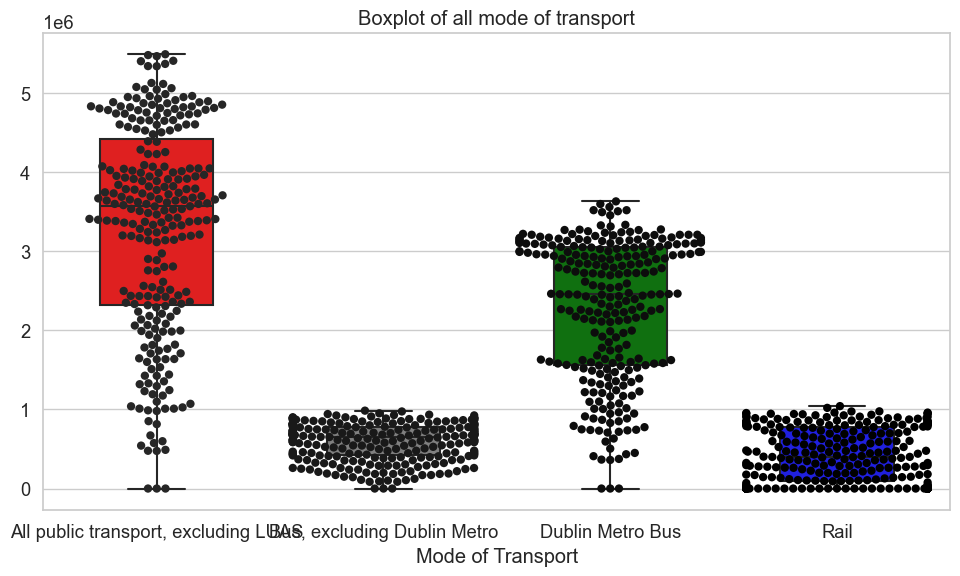

In [22]:
plt.figure(figsize=(10, 6)) # Setting the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Addind a white space on the back and adjustive font scale.
# Creates the boxplot
ax = sns.boxplot(data=df_pivot[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']], width=0.5, palette=['red', 'gray','green','blue'])
ax.set_title('Boxplot of all mode of transport') # Add title to the figure.
# Adds each data points with swarmplot (dots) and the color black was chosen for the dots because of the easy identification.
sns.swarmplot(data=df_pivot[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']], color='black', size=6)
plt.tight_layout() # Adjusts the layout
plt.show() # Shows the plot

- The boxplot and its data points (swarnplot) appear greatly reduced, so the scaling method will be applied to display a clear view of all boxplots.

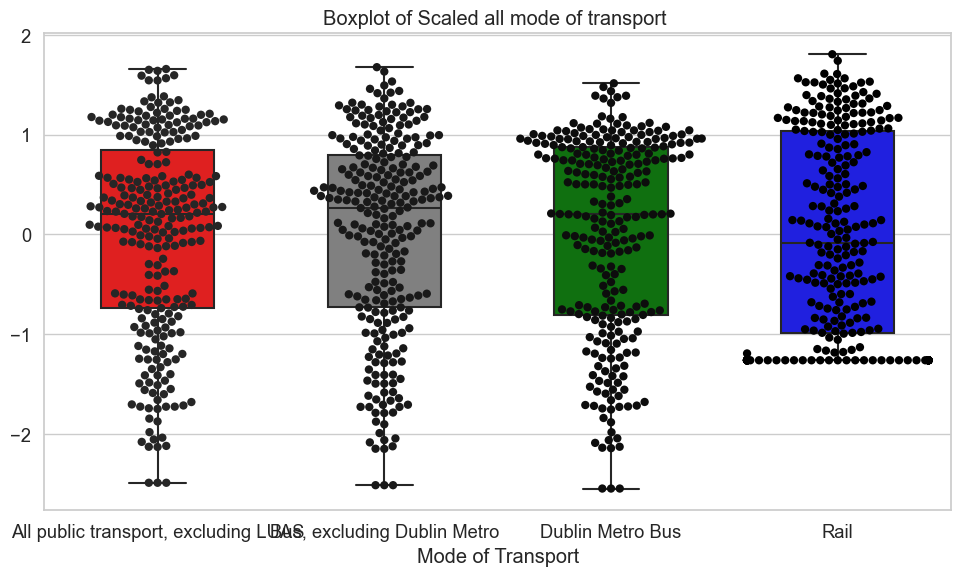

In [23]:
# Creating a separate (copy) DataFrame for scaling.
df_plan_ie_scaled = df_pivot.copy()
scaler = StandardScaler() # Standardize the variables.
# Scaling the dataset.
df_plan_ie_scaled[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']] = scaler.fit_transform(
df_plan_ie_scaled[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']])

# Creates the figure with the boxplots. 
plt.figure(figsize=(10, 6)) # Setting the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Addind a white space on the back and adjustive font scale.
# Create the boxplot
ax = sns.boxplot(data=df_plan_ie_scaled[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']], width=0.5, palette=['red', 'gray','green','blue'])
ax.set_title('Boxplot of Scaled all mode of transport ') # Add title to the figure.
# Adds each data points with swarmplot (dots) and the color black was chosen for the dots because of the easy identification.
sns.swarmplot(data=df_plan_ie_scaled[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']], color='black', size=6)
plt.tight_layout() # Adjusts the layout.
plt.show() # Shows the plot.

- Looking at the boxplot before and after interpolation, it is clear that it ended up smoothing the data by reducing the number of points outside the whiskers.
- After applying the standard scaler, not only it is possible to observe how the data is distributed but also to identify outliers in the data set.
- The outliers in the dataset are valid data points found over time, and despite being outliers, they are facts, so based on this, the outliers remained in the analysis.
- It is important to remember that the Rail transport category has its data with a zero value for all weeks of 2019.

In [24]:
df_pivot.columns

Index(['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro',
       'Dublin Metro Bus', 'Rail', 'Year', 'Date', 'Year-Month'],
      dtype='object', name='Mode of Transport')

### Line charts

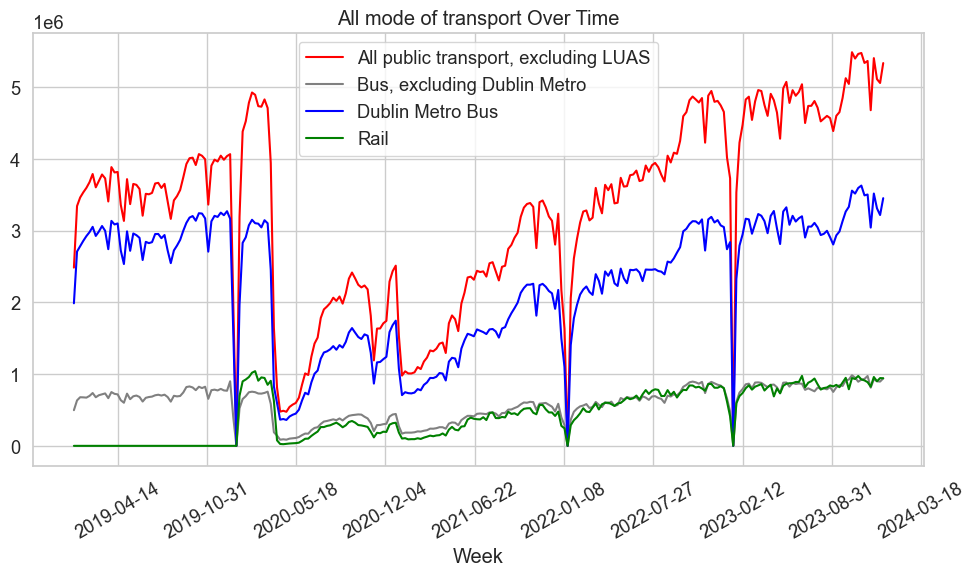

In [25]:
# Creates a figure with a lineplot representing the values of the dataset over time.
plt.figure(figsize=(10, 6)) # Sets the size.
# Add the lines of the plot designating its values and labels.
plt.plot(df_pivot.index, df_pivot['All public transport, excluding LUAS'], label='All public transport, excluding LUAS', 
         color='red')
plt.plot(df_pivot.index, df_pivot['Bus, excluding Dublin Metro'], label='Bus, excluding Dublin Metro', color='gray')
plt.plot(df_pivot.index, df_pivot['Dublin Metro Bus'], label='Dublin Metro Bus', color='blue')
plt.plot(df_pivot.index, df_pivot['Rail'], label='Rail', color='green')
plt.xlabel('Week') # Adds label for x-axis.
plt.title('All mode of transport Over Time') # Adds a title for the figure.
plt.legend() # Add a legend for the plot.

# Limiting the number of x-axis ticks to avoid overlap
max_ticks = 10  # Sets the maximum ticks in the x-axis, this case 10.
x_locator = ticker.MaxNLocator(max_ticks) # Creates a locator to set the position according to the number given, whis is ten.
plt.gca().xaxis.set_major_locator(x_locator) # Set ticks for x-axis.
plt.xticks(rotation=30) # Rotates the x-label in 30 degrees.
plt.tight_layout() # Adjust the plot.
plt.show() # Display the lineplot.

- In the graph above, we can visualize how the trend in public transport use behaved from 2019 to the end of 2023, and analyze various categories of public transport and trend lines over time.

# Statistics

#### Distribution and correlation of all mode of transport

<Figure size 1600x1200 with 0 Axes>

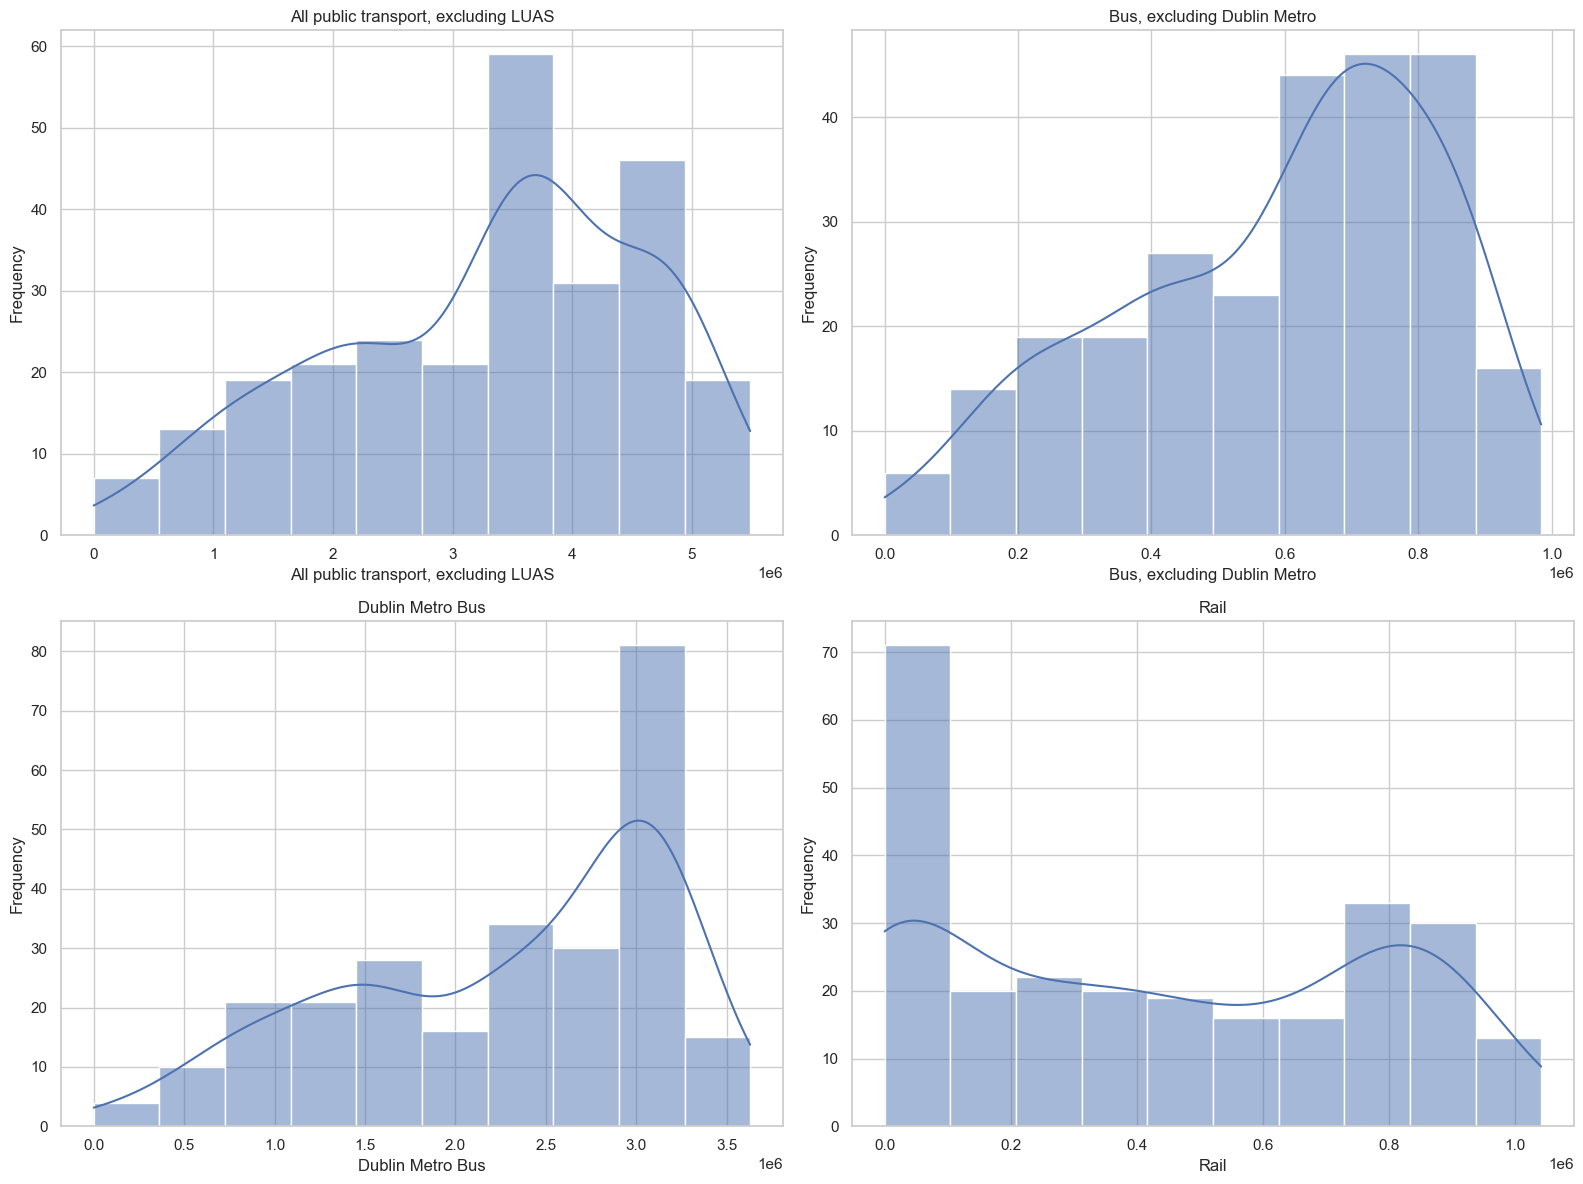

In [26]:
plt.figure(figsize=(16, 12)) # Set the figure size and style.
sns.set(style='whitegrid') # Add white in the back for clear visualization.
# Determines the number of rows and columns for subplots.
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows), squeeze=False) # Creates subplots
axes = axes.flatten() # Flattens the axes array for easy iteration
# Iterate over the columns in the df_pivot dataset and create a histogram for each one, in this case two.
for i, column in enumerate(df_pivot[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']].columns):
    ax = axes[i]  # Get the current axis
    sns.histplot(df_pivot[column], kde=True, ax=ax)
    ax.set_title(column)  # Set the title for the current subplot
    ax.set_ylabel('Frequency')  # Set the y-label for the current subplot
fig.tight_layout() # Adjust the layout and spacing
plt.show() # Show the plot

- This is a histogram of bars and lines that represents the frequency of all available transport in the Ireland dataset. The frequency varies along the x-axis for each type of transport.

'Correlation between all mode of transport:'

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail
Mode of Transport,,,,
"All public transport, excluding LUAS",1.000000,0.982665,0.968947,0.668197
"Bus, excluding Dublin Metro",0.982665,1.000000,0.983439,0.550521
Dublin Metro Bus,0.968947,0.983439,1.000000,0.464950
Rail,0.668197,0.550521,0.464950,1.000000


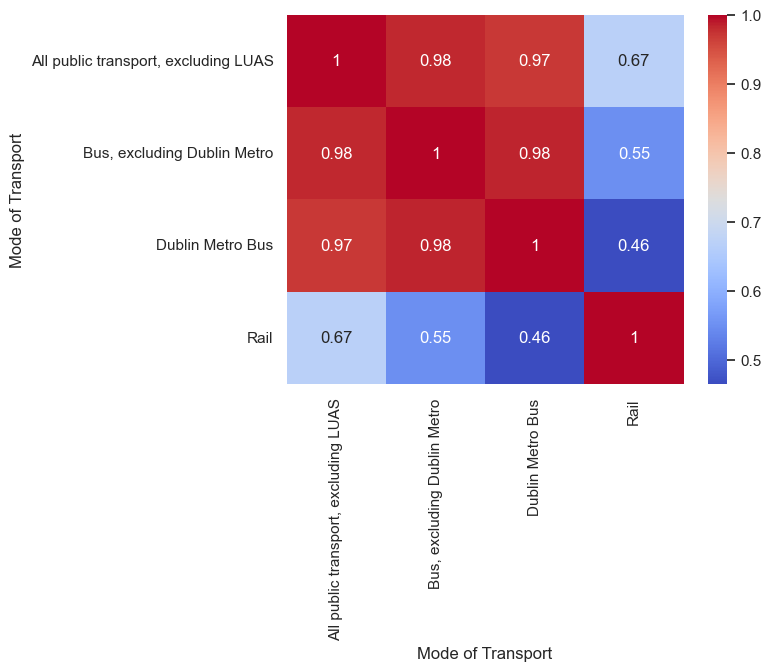

In [27]:
# Calculating the correlation between all mode of transport.
display("Correlation between all mode of transport:")

corr = df_pivot[['All public transport, excluding LUAS', 'Bus, excluding Dublin Metro','Dublin Metro Bus','Rail']].corr()

display(corr)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

- Using the heat map, it is possible to analyze that there is a strong correlation between the bus category and Dublin Metro, and a low correlation with the Rail category, considering an independent variable

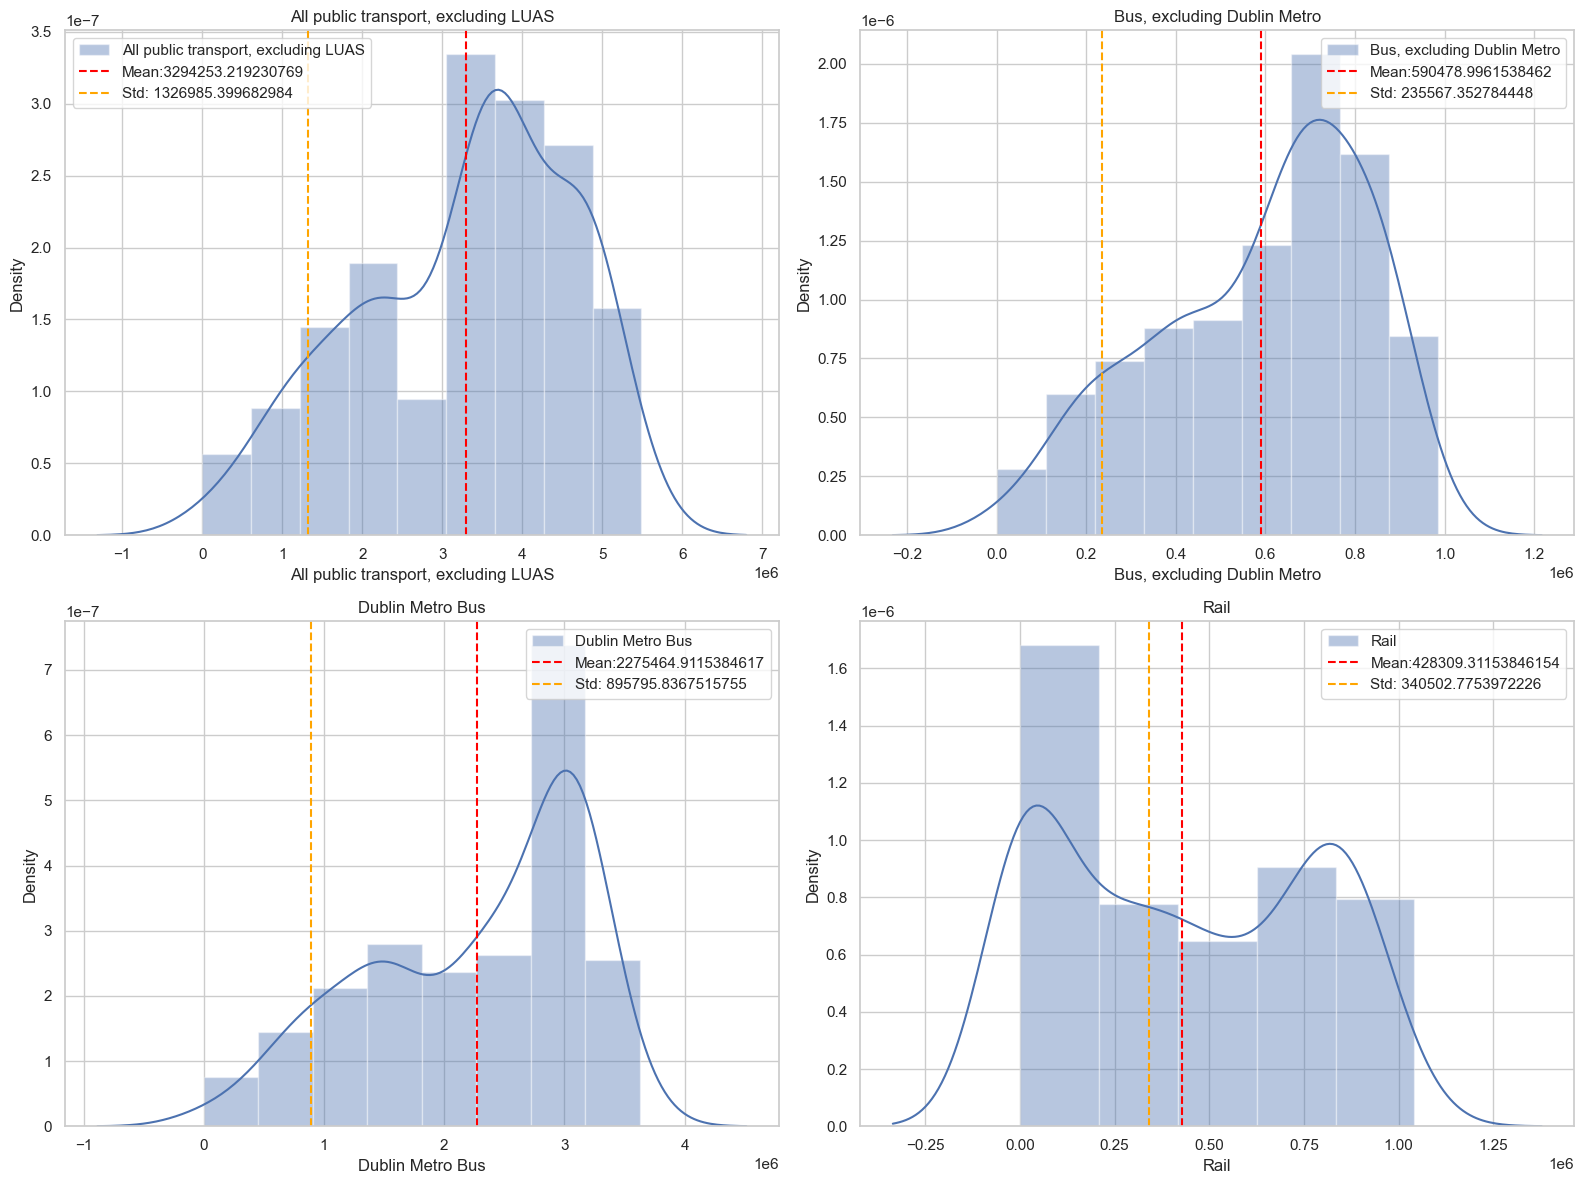

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot the distributions on the subplots

std_dev = df_pivot["All public transport, excluding LUAS"].std()
mean = df_pivot["All public transport, excluding LUAS"].mean()
sns.distplot(df_pivot["All public transport, excluding LUAS"], ax=axes[0, 0], label='All public transport, excluding LUAS')
axes[0, 0].set_title('All public transport, excluding LUAS')
axes[0, 0].axvline(df_pivot["All public transport, excluding LUAS"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[0, 0].axvline(df_pivot["All public transport, excluding LUAS"].std(), color='orange', linestyle='--', label= (f'Std: {std_dev}'))
axes[0, 0].legend()



std_dev = df_pivot["Bus, excluding Dublin Metro"].std()
mean = df_pivot["Bus, excluding Dublin Metro"].mean()                 
sns.distplot(df_pivot["Bus, excluding Dublin Metro"], kde=True, ax=axes[0, 1], label='Bus, excluding Dublin Metro')
axes[0, 1].set_title('Bus, excluding Dublin Metro')
axes[0, 1].axvline(df_pivot["Bus, excluding Dublin Metro"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[0, 1].axvline(df_pivot["Bus, excluding Dublin Metro"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[0, 1].legend()




std_dev = df_pivot["Dublin Metro Bus"].std()
mean = df_pivot["Dublin Metro Bus"].mean()
sns.distplot(df_pivot["Dublin Metro Bus"], kde=True, ax=axes[1, 0], label='Dublin Metro Bus')
axes[1, 0].set_title('Dublin Metro Bus')
axes[1, 0].axvline(df_pivot["Dublin Metro Bus"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[1, 0].axvline(df_pivot["Dublin Metro Bus"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[1, 0].legend()




std_dev = df_pivot["Rail"].std()
mean = df_pivot["Rail"].mean()
sns.distplot(df_pivot["Rail"], kde=True, ax=axes[1, 1], label='Rail')
axes[1, 1].set_title('Rail')
axes[1, 1].axvline(df_pivot["Rail"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[1, 1].axvline(df_pivot["Rail"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[1, 1].legend()

# Tighten the layout of the subplots
plt.tight_layout()

- The graphs show the density distributions for different modes of transport from the Ireland dataset. Density distribution is a way of visualizing the probability of a value occurring in a set of data. The greater the height of the curve, the greater the probability that a value will be in this range

- The red vertical lines represent the means and the yellow lines represent the standard deviation limits, which measure the variation of the data around the mean. The narrower the curve, the smaller the standard deviation and the more concentrated the data around the mean

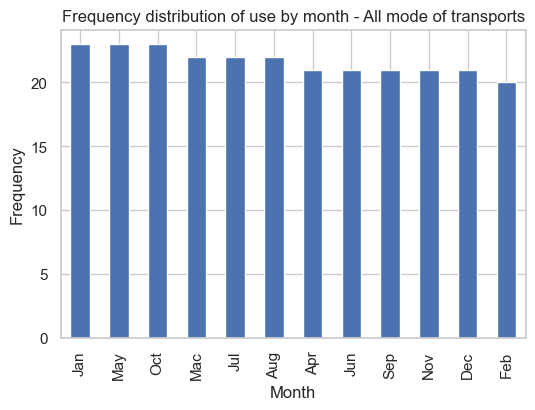

In [29]:
plt.figure(figsize=(6, 4))
df_pivot['Date'].dt.month.map(
    {
        1:'Jan',
        2:'Feb',
        3:'Mac',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
    }
).value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency distribution of use by month - All mode of transports')

plt.show()

- The bar chart above displays the distribution of frequency of use per month for all modes of transport present in the dataset, showing the amount of transport activity for each month represented by the month names on the x-axis and the frequency on the y-axis.
- Identifying the months with the highest usage rates of January, May, October, and February with a lower usage frequency.


### Data Public Transport Austrália

In [30]:
df_compare = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20231226.csv")
df_compare.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,NaN
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [31]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1639 non-null   object 
 1   Local Route   1639 non-null   int64  
 2   Light Rail    1639 non-null   int64  
 3   Peak Service  1639 non-null   int64  
 4   Rapid Route   1639 non-null   int64  
 5   School        1639 non-null   int64  
 6   Other         1636 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 89.8+ KB


In [32]:
df_compare['Date'] = pd.to_datetime(df_compare['Date'])
df_compare.sort_values(by='Date', inplace=True)
df_compare.fillna(0, inplace=True)
df_compare

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2019-01-07,15987,9962,407,21223,3715,0.0
283,2019-01-08,19950,12601,459,25864,5754,1.0
759,2019-01-09,3761,4682,0,5936,0,0.0
77,2019-01-10,15028,12441,421,24365,0,1.0
1628,2019-01-11,18179,12743,337,24242,5251,1.0
...,...,...,...,...,...,...,...
959,2023-12-21,12701,8381,244,15083,0,1303.0
726,2023-12-22,10988,8151,104,13556,0,1144.0
306,2023-12-23,4248,4871,0,7441,0,444.0
1280,2023-12-24,2527,3481,0,5191,0,399.0


In [33]:
df_compare.set_index('Date', inplace=True)
df_compare['Date'] = df_compare.index
df_compare.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Date
Date,,,,,,,
2019-01-07,15987,9962,407,21223,3715,0.0,2019-01-07
2019-01-08,19950,12601,459,25864,5754,1.0,2019-01-08
2019-01-09,3761,4682,0,5936,0,0.0,2019-01-09
2019-01-10,15028,12441,421,24365,0,1.0,2019-01-10
2019-01-11,18179,12743,337,24242,5251,1.0,2019-01-11


In [34]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1639 entries, 2019-01-07 to 2023-12-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Local Route   1639 non-null   int64         
 1   Light Rail    1639 non-null   int64         
 2   Peak Service  1639 non-null   int64         
 3   Rapid Route   1639 non-null   int64         
 4   School        1639 non-null   int64         
 5   Other         1639 non-null   float64       
 6   Date          1639 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 102.4 KB


In [35]:
df_compare['Year-Month'] = df_compare['Date'].apply(lambda x: x.strftime("%Y-%m"))
df_compare['Year'] = df_compare['Date'].apply(lambda x: int(x.strftime("%Y")))
df_compare.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Date,Year-Month,Year
Date,,,,,,,,,
2019-01-07,15987,9962,407,21223,3715,0.0,2019-01-07,2019-01,2019
2019-01-08,19950,12601,459,25864,5754,1.0,2019-01-08,2019-01,2019
2019-01-09,3761,4682,0,5936,0,0.0,2019-01-09,2019-01,2019
2019-01-10,15028,12441,421,24365,0,1.0,2019-01-10,2019-01,2019
2019-01-11,18179,12743,337,24242,5251,1.0,2019-01-11,2019-01,2019


In [36]:
df_compare.columns[:-3]

Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other'],
      dtype='object')

In [37]:
df_compare_group = df_compare.groupby(['Year-Month'])[df_compare.columns[:-3]].sum()
df_compare_group.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Year-Month,,,,,,
2019-01,75618,56785,1624,108162,14720,6.0
2019-02,88730,64352,2065,125600,20563,3.0
2019-03,76187,56937,1812,107504,14641,2.0
2019-04,88646,61676,2131,123147,19714,2.0
2019-05,93545,64617,2181,127342,24874,1.0


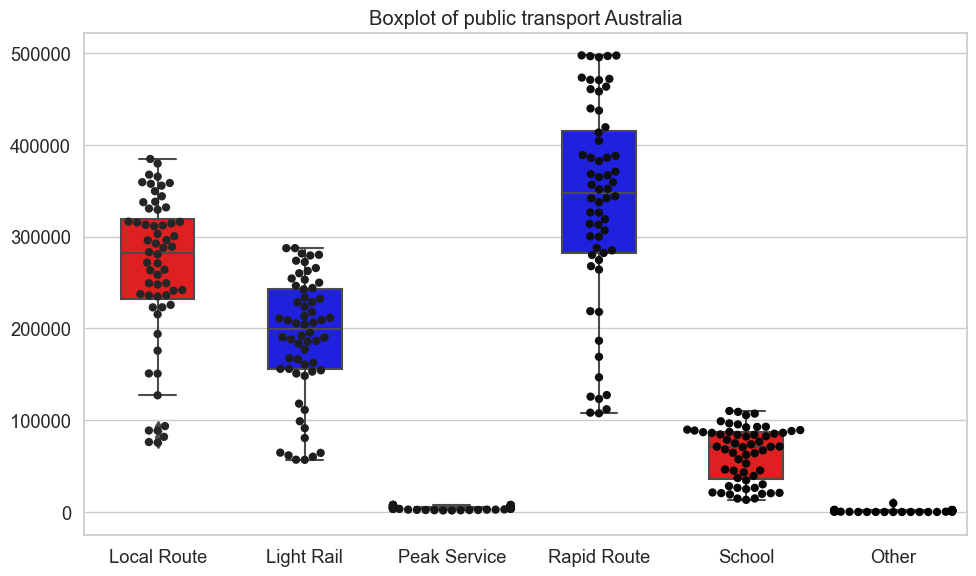

In [38]:
plt.figure(figsize=(10, 6)) # Setting the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Addind a white space on the back and adjustive font scale.
# Creates the boxplot
ax = sns.boxplot(data=df_compare_group[df_compare_group.columns], width=0.5, palette=['red', 'blue'])
ax.set_title('Boxplot of public transport Australia') # Add title to the figure.
# Adds each data points with swarmplot (dots) and the color black was chosen for the dots because of the easy identification.
sns.swarmplot(data=df_compare_group[df_compare_group.columns], color='black', size=6)
plt.tight_layout() # Adjusts the layout
plt.show() # Shows the plot

- By observing the boxplot it is possible to observe how the data is distributed, and also identify outliers in the data set.
- The outliers in the dataset are valid data points found over time and although they are outliers, they are facts, so on this basis, the outliers remained in the analysis.


In [39]:
df_compare.columns

Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other', 'Date', 'Year-Month', 'Year'],
      dtype='object')

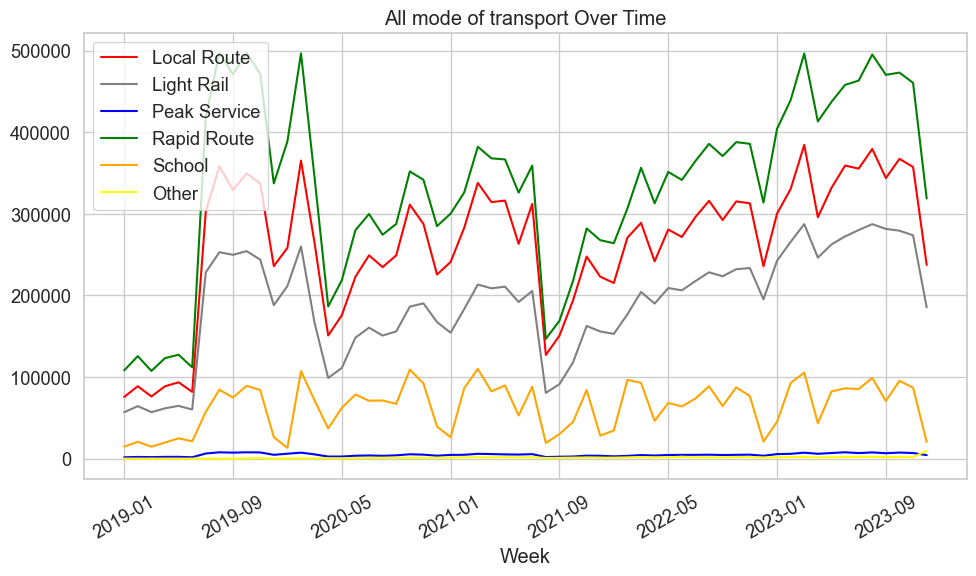

In [40]:
# Creates a figure with a lineplot representing the values of the dataset over time.
plt.figure(figsize=(10, 6)) # Sets the size.
# Add the lines of the plot designating its values and labels.
plt.plot(df_compare_group.index, df_compare_group['Local Route'], label='Local Route',color='red')
plt.plot(df_compare_group.index, df_compare_group['Light Rail'], label='Light Rail', color='gray')
plt.plot(df_compare_group.index, df_compare_group['Peak Service'], label='Peak Service', color='blue')
plt.plot(df_compare_group.index, df_compare_group['Rapid Route'], label='Rapid Route', color='green')
plt.plot(df_compare_group.index, df_compare_group['School'], label='School', color='orange')
plt.plot(df_compare_group.index, df_compare_group['Other'], label='Other', color='yellow')
plt.xlabel('Week') # Adds label for x-axis.
plt.title('All mode of transport Over Time') # Adds a title for the figure.
plt.legend() # Add a legend for the plot.

# Limiting the number of x-axis ticks to avoid overlap
max_ticks = 10  # Sets the maximum ticks in the x-axis, this case 10.
x_locator = ticker.MaxNLocator(max_ticks) # Creates a locator to set the position according to the number given, whis is ten.
plt.gca().xaxis.set_major_locator(x_locator) # Set ticks for x-axis.
plt.xticks(rotation=30) # Rotates the x-label in 30 degrees.
plt.tight_layout() # Adjust the plot.
plt.show() # Display the lineplot.

In the graph above, is possible visualize how the trend in public transport use behaved from 2019 to the end of 2023, and analyze various categories of public transport and trend lines over time.

<Figure size 1600x1200 with 0 Axes>

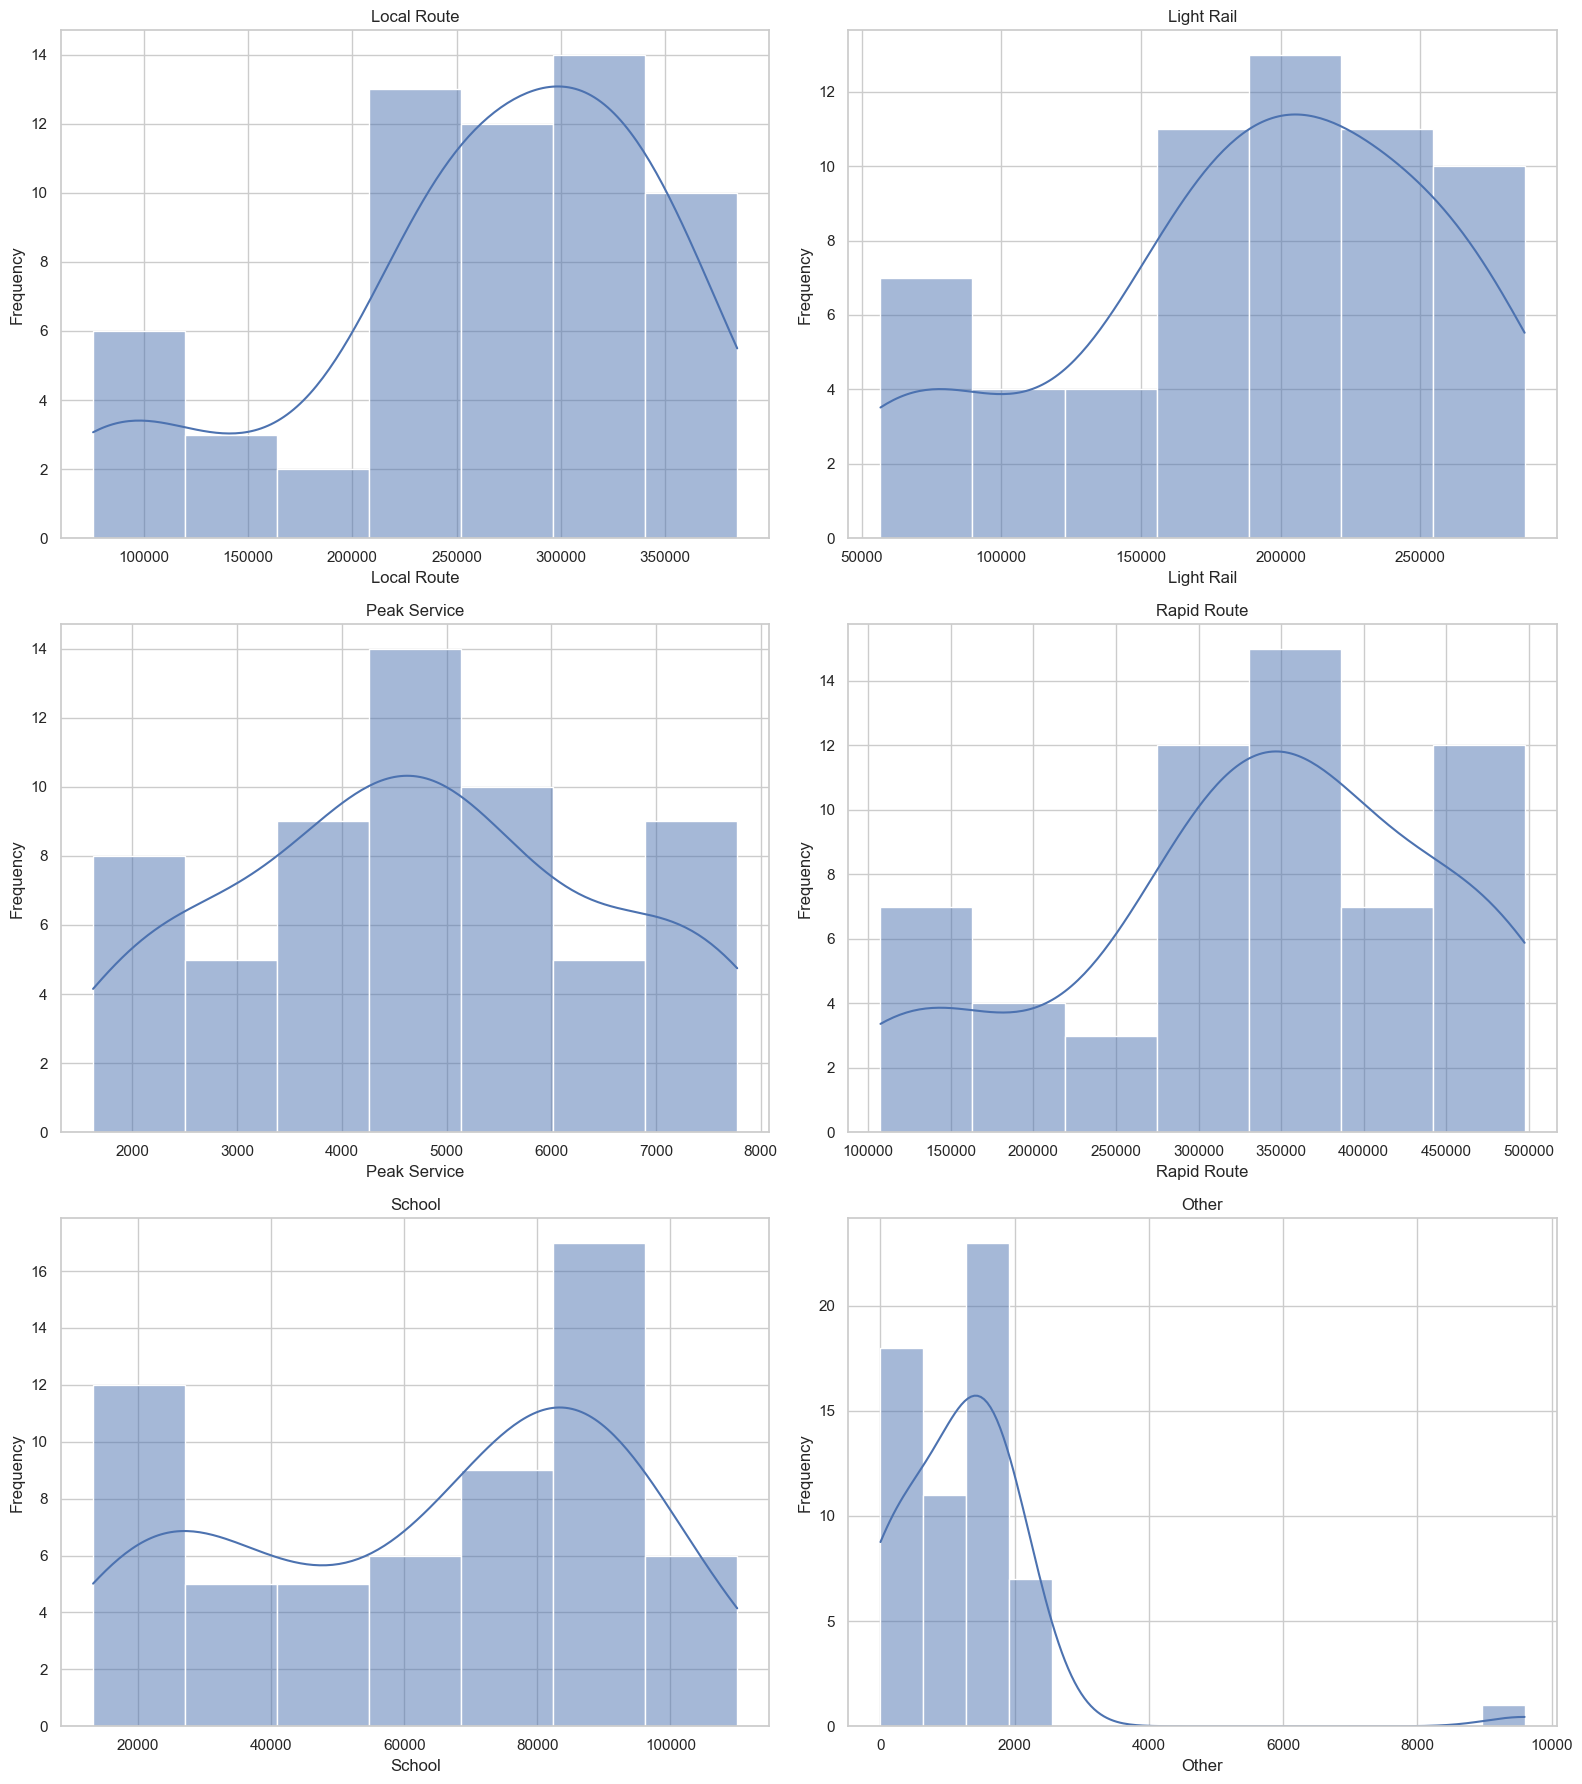

In [41]:
plt.figure(figsize=(16, 12)) # Set the figure size and style.
sns.set(style='whitegrid') # Add white in the back for clear visualization.
# Determines the number of rows and columns for subplots.
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows), squeeze=False) # Creates subplots
axes = axes.flatten() # Flattens the axes array for easy iteration
# Iterate over the columns in the df_compare_group dataset and create a histogram for each one, in this case two.
for i, column in enumerate(df_compare_group.columns):
    ax = axes[i]  # Get the current axis
    sns.histplot(df_compare_group[column], kde=True, ax=ax)
    ax.set_title(column)  # Set the title for the current subplot
    ax.set_ylabel('Frequency')  # Set the y-label for the current subplot
fig.tight_layout() # Adjust the layout and spacing
plt.show() # Show the plot

- This is a histogram of bars and lines that represents the frequency of all transport available in the Australia dataset. The frequency varies along the x-axis for each type of transport.

'Correlation between all transports Australia:'

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Local Route,1.000000,0.968565,0.918313,0.973986,0.805123,0.286185
Light Rail,0.968565,1.000000,0.924156,0.983500,0.684613,0.311198
Peak Service,0.918313,0.924156,1.000000,0.962083,0.664480,0.164678
Rapid Route,0.973986,0.983500,0.962083,1.000000,0.707821,0.238634
School,0.805123,0.684613,0.664480,0.707821,1.000000,0.104002
Other,0.286185,0.311198,0.164678,0.238634,0.104002,1.000000


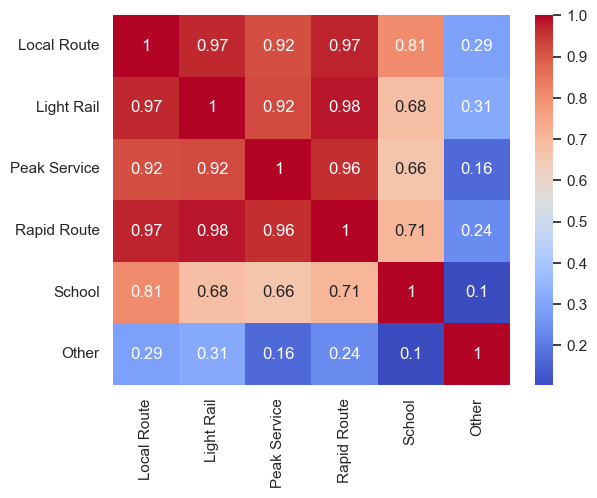

In [42]:
# Calculating the correlation between all mode of transport.
display("Correlation between all transports Australia:")

corr = df_compare_group.corr()

display(corr)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

- Using the heat map, it is possible to analyze that there is a strong correlation between the bus local route, Light Rail, Peak Service and Rapid Route category and School and Other category shows a low correlation, considering an independents variables.


In [43]:
df_compare.columns

Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other', 'Date', 'Year-Month', 'Year'],
      dtype='object')

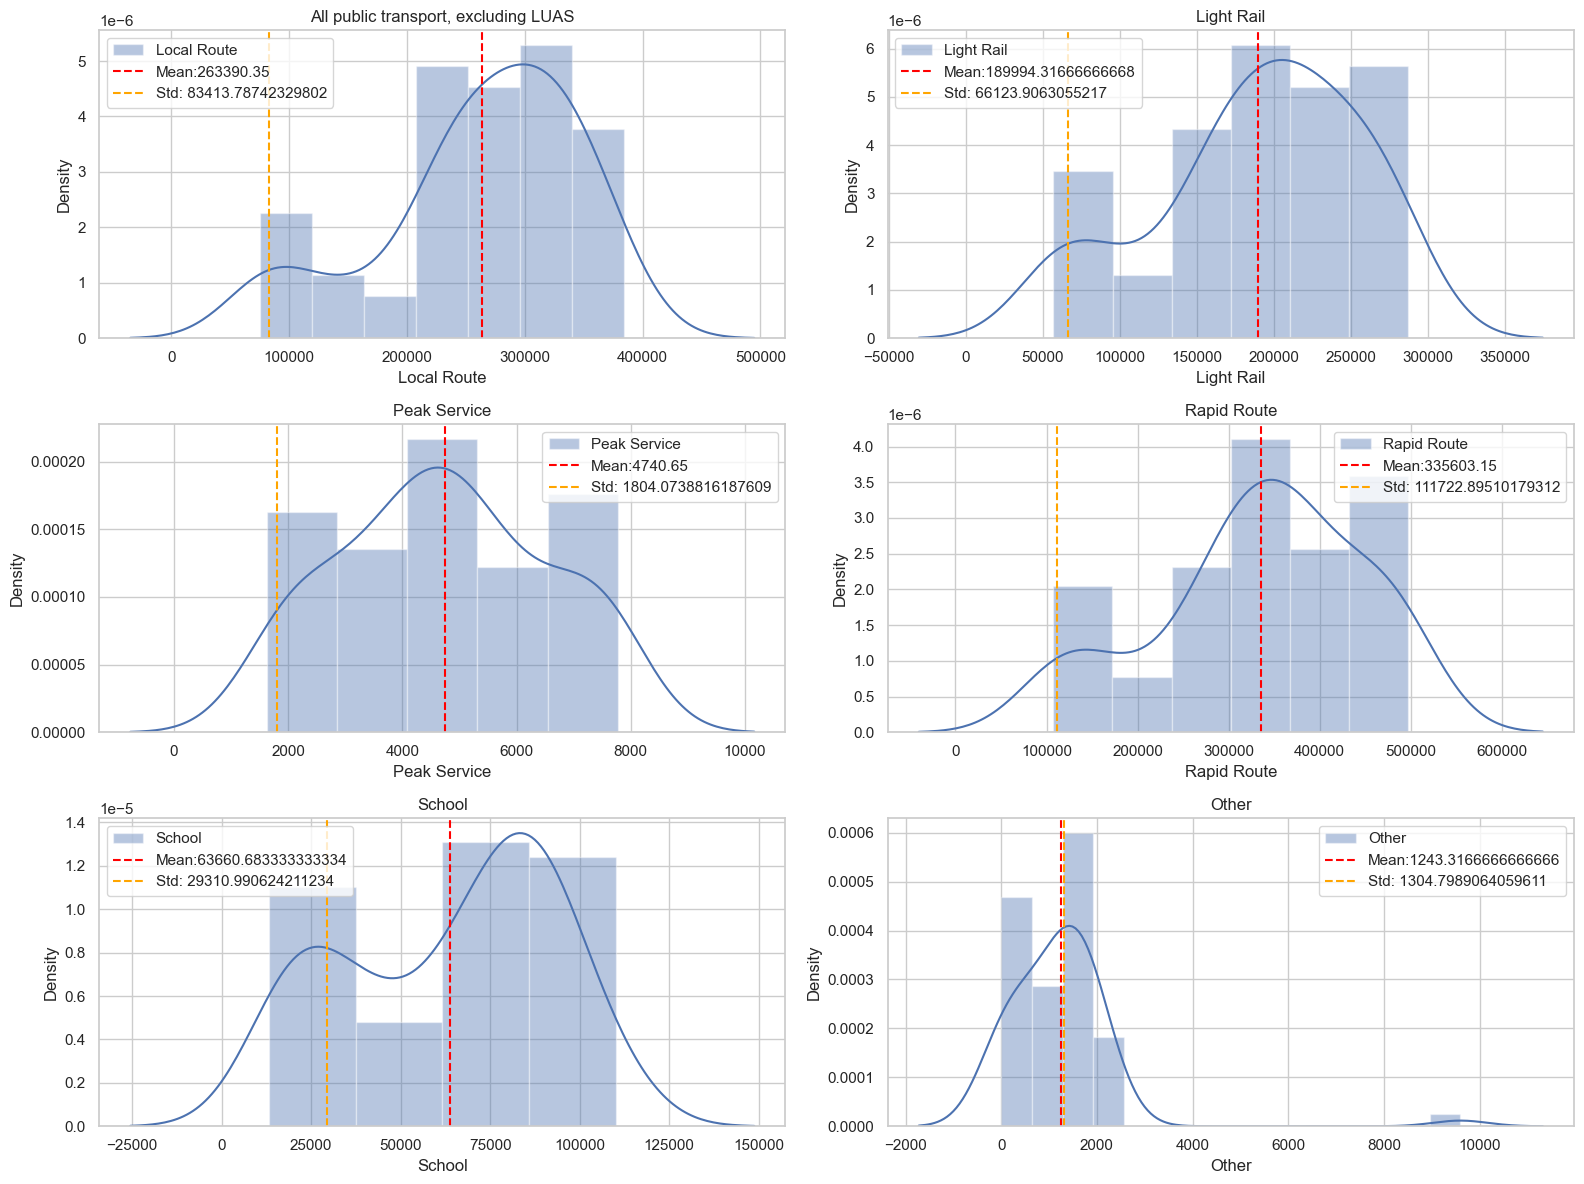

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Plot the distributions on the subplots

std_dev = df_compare_group["Local Route"].std()
mean = df_compare_group["Local Route"].mean()
sns.distplot(df_compare_group["Local Route"], ax=axes[0, 0], label='Local Route')
axes[0, 0].set_title('All public transport, excluding LUAS')
axes[0, 0].axvline(df_compare_group["Local Route"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[0, 0].axvline(df_compare_group["Local Route"].std(), color='orange', linestyle='--', label= (f'Std: {std_dev}'))
axes[0, 0].legend()

std_dev = df_compare_group["Light Rail"].std()
mean = df_compare_group["Light Rail"].mean()                 
sns.distplot(df_compare_group["Light Rail"], kde=True, ax=axes[0, 1], label='Light Rail')
axes[0, 1].set_title('Light Rail')
axes[0, 1].axvline(df_compare_group["Light Rail"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[0, 1].axvline(df_compare_group["Light Rail"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[0, 1].legend()

std_dev = df_compare_group["Peak Service"].std()
mean = df_compare_group["Peak Service"].mean()
sns.distplot(df_compare_group["Peak Service"], kde=True, ax=axes[1, 0], label='Peak Service')
axes[1, 0].set_title('Peak Service')
axes[1, 0].axvline(df_compare_group["Peak Service"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[1, 0].axvline(df_compare_group["Peak Service"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[1, 0].legend()

std_dev = df_compare_group["Rapid Route"].std()
mean = df_compare_group["Rapid Route"].mean()
sns.distplot(df_compare_group["Rapid Route"], kde=True, ax=axes[1, 1], label='Rapid Route')
axes[1, 1].set_title('Rapid Route')
axes[1, 1].axvline(df_compare_group["Rapid Route"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[1, 1].axvline(df_compare_group["Rapid Route"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[1, 1].legend()

std_dev = df_compare_group["School"].std()
mean = df_compare_group["School"].mean()
sns.distplot(df_compare_group["School"], kde=True, ax=axes[2, 0], label='School')
axes[2, 0].set_title('School')
axes[2, 0].axvline(df_compare_group["School"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[2, 0].axvline(df_compare_group["School"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[2, 0].legend()

std_dev = df_compare_group["Other"].std()
mean = df_compare_group["Other"].mean()
sns.distplot(df_compare_group["Other"], kde=True, ax=axes[2, 1], label='Other')
axes[2, 1].set_title('Other')
axes[2, 1].axvline(df_compare_group["Other"].mean(), color='red', linestyle='--', label=(f'Mean:{mean}'))
axes[2, 1].axvline(df_compare_group["Other"].std(), color='orange', linestyle='--', label=(f'Std: {std_dev}'))
axes[2, 1].legend()

# Tighten the layout of the subplots
plt.tight_layout()

- The graphs show the density distributions for different modes of transport from the Australia dataset. Density distribution is a way of visualizing the probability of a value occurring in a set of data. The greater the height of the curve, the greater the probability that a value will be in this range

- The red vertical lines represent the means and the yellow lines represent the standard deviation limits, which measure the variation of the data around the mean. The narrower the curve, the smaller the standard deviation and the more concentrated the data around the mean

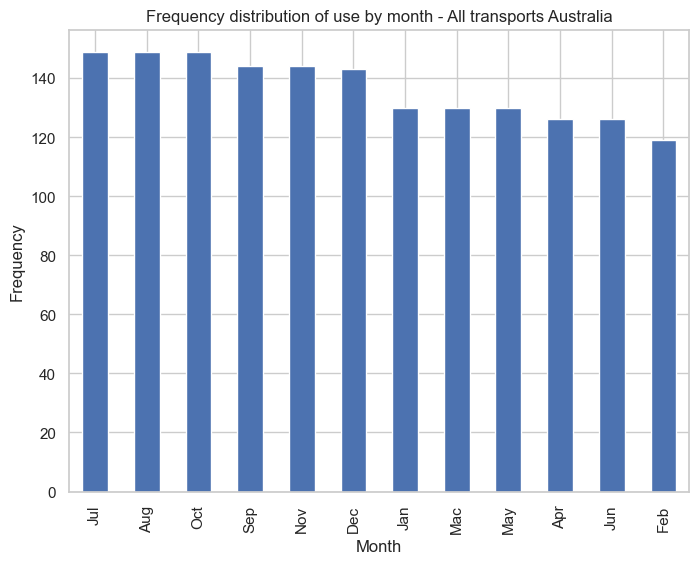

In [45]:
plt.figure(figsize=(8, 6))
df_compare['Date'].dt.month.map(
    {
        1:'Jan',
        2:'Feb',
        3:'Mac',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec',
    }
).value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency distribution of use by month - All transports Australia')

plt.show()

- The bar chart above displays the distribution of frequency of use per month for all modes of transport present in the dataset, showing the amount of transport activity for each month represented by the month names on the x-axis and the frequency on the y-axis.
- Identifying the months with the highest usage rates of July, August, and October and April, June, and February with a lower usage frequency.


## Compare All transports ireland and Australia

In [46]:
df_pivot_group = df_pivot.groupby(['Year-Month'])['All public transport, excluding LUAS'].sum()

In [47]:
df_plot_compare = pd.DataFrame({'date':df_pivot_group.index,'ireland Transports':df_pivot_group.values,'Australia Transports':df_compare_group.sum(axis=1).values}).set_index('date')
df_plot_compare.head()

,ireland Transports,Australia Transports
date,,
2019-01,12826093.0,256915.0
2019-02,14669070.0,301313.0
2019-03,18502880.0,257083.0
2019-04,14128505.0,295316.0
2019-05,14381017.0,312560.0


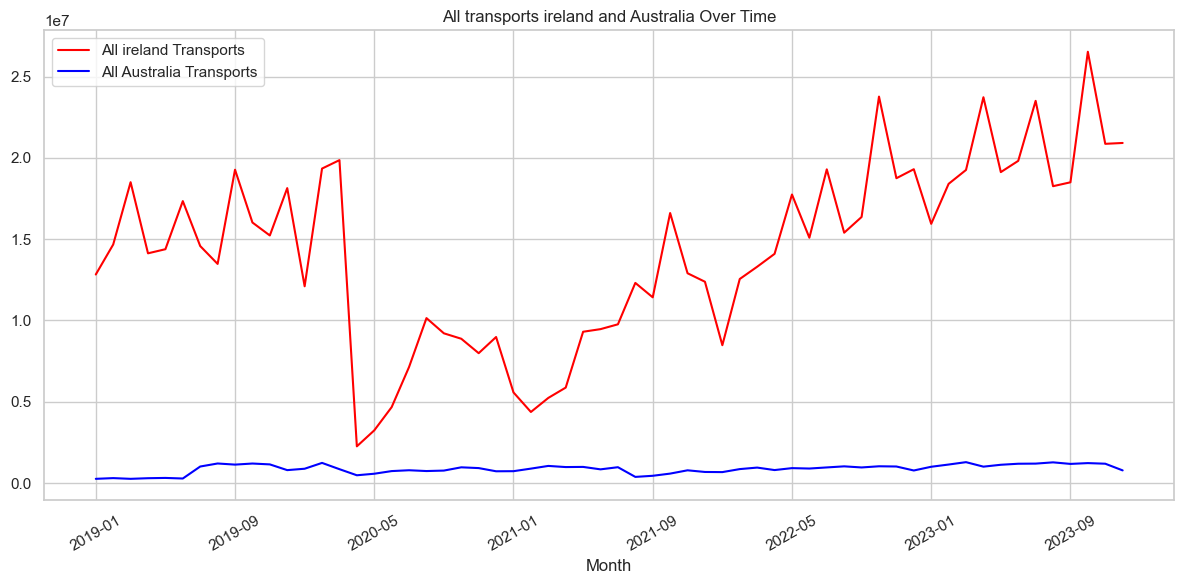

In [48]:
# Creates a figure with a lineplot representing the values of the dataset over time.
plt.figure(figsize=(12, 6)) # Sets the size.
# Add the lines of the plot designating its values and labels.
plt.plot(df_plot_compare.index, df_plot_compare['ireland Transports'], label='All ireland Transports',color='red')
plt.plot(df_plot_compare.index, df_plot_compare['Australia Transports'], label='All Australia Transports', color='blue')
plt.xlabel('Month') # Adds label for x-axis.
plt.title('All transports ireland and Australia Over Time') # Adds a title for the figure.
plt.legend() # Add a legend for the plot.

# Limiting the number of x-axis ticks to avoid overlap
max_ticks = 10  # Sets the maximum ticks in the x-axis, this case 10.
x_locator = ticker.MaxNLocator(max_ticks) # Creates a locator to set the position according to the number given, whis is ten.
plt.gca().xaxis.set_major_locator(x_locator) # Set ticks for x-axis.
plt.xticks(rotation=30) # Rotates the x-label in 30 degrees.
plt.tight_layout() # Adjust the plot.
plt.show() # Display the lineplot.

- This graph shows the monthly flow of public transport usage in Ireland x Australia, and we can already see the discrepancy between the two cities, Dublin shows to have extremely high numbers compared to Canberra.

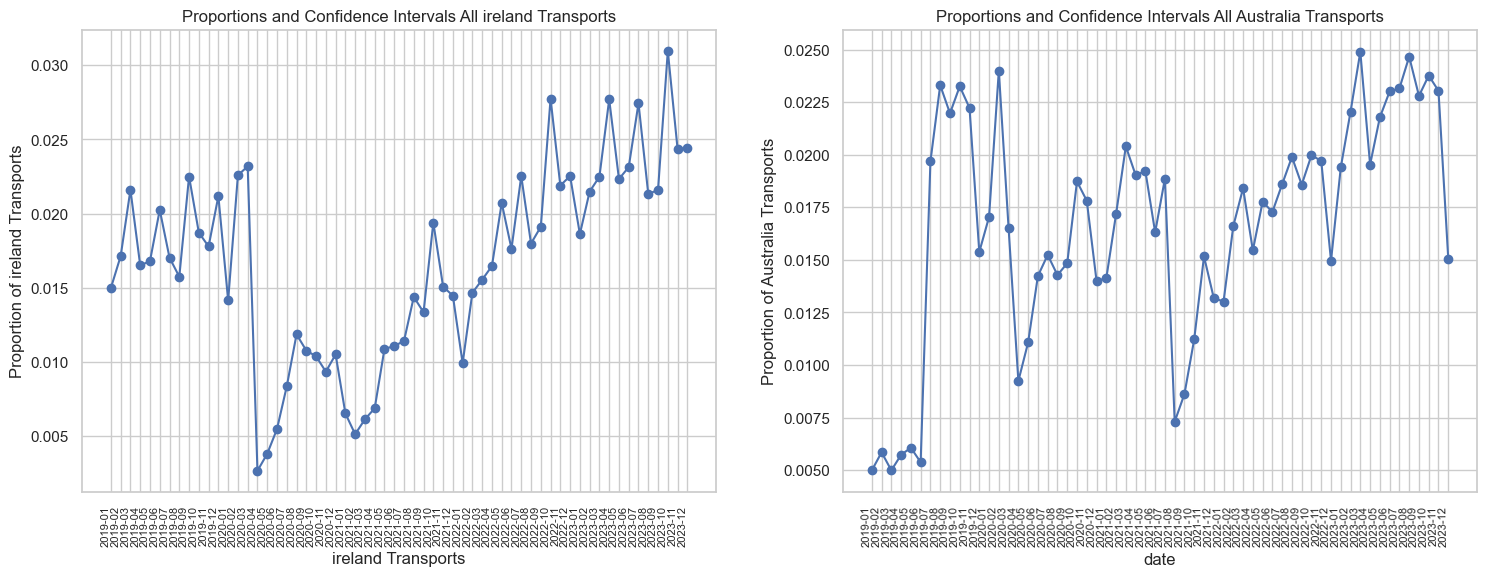

In [49]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))


# Calculate Proportion of all transports for Each year-month - Ireland Dataset
# --------------------------------------------------------------
total_ireland_transports =  df_plot_compare['ireland Transports'].sum()
proportions = df_plot_compare['ireland Transports'] / total_ireland_transports

# Calculate Confidence Intervals for Proportions
conf_intervals = proportion_confint(count=df_plot_compare['ireland Transports'], nobs=total_ireland_transports, alpha=0.05, method='normal')

# Create a DataFrame to store the results
results = pd.DataFrame()
results['ireland Transports'] = df_plot_compare['ireland Transports']
results['Proportion'] = proportions.values
results['Lower CI'] =  conf_intervals[0]
results['Upper CI'] =  conf_intervals[1]
results = results.reset_index()


# Plot the proportion vs month and overlay the confidence intervals

ax0.plot(results['date'], results['Proportion'], marker='o', linestyle='-')
ax0.fill_between(results['date'], results['Lower CI'], results['Upper CI'], alpha=0.2)

# Set labels and title
ax0.set_xlabel('ireland Transports')
ax0.set_ylabel('Proportion of ireland Transports')
ax0.set_title('Proportions and Confidence Intervals All ireland Transports')
ax0.set_xticklabels(results['date'], rotation=90, ha='right')
ax0.tick_params(axis='x', labelsize=8)

# -------------------------------------------- End ireland Dataset

# Calculate Proportion of All transports for Each year-month - Australia Dataset
total_australia_transports =  df_plot_compare['Australia Transports'].sum()
proportions = df_plot_compare['Australia Transports'] / total_australia_transports

# Calculate Confidence Intervals for Proportions
conf_intervals = proportion_confint(count=df_plot_compare['Australia Transports'], nobs=total_australia_transports, alpha=0.05, method='normal')

# Create a DataFrame to store the results
results = pd.DataFrame()
results['Australia Transports'] = df_plot_compare['Australia Transports']
results['Proportion'] = proportions.values
results['Lower CI'] =  conf_intervals[0]
results['Upper CI'] =  conf_intervals[1]
results = results.reset_index()

# Plot the proportion vs month and overlay the confidence intervals
ax1.plot(results['date'], results['Proportion'], marker='o', linestyle='-')
ax1.fill_between(results['date'], results['Lower CI'], results['Upper CI'], alpha=0.2)

# Set labels and title
ax1.set_xlabel('date')
ax1.set_ylabel('Proportion of Australia Transports')
ax1.set_title('Proportions and Confidence Intervals All Australia Transports')
ax1.set_xticklabels(results['date'], rotation=91, ha='right')
ax1.tick_params(axis='x', labelsize=8)


plt.show()

- This is a line graph with confidence intervals for the proportions of the two data sets relating to transport in Ireland and Australia.
- Overall it is a comparison of the proportions of transport in Ireland and Australia over time, with confidence intervals highlighted.

In [50]:
# Randomly sample 20% of dataset with all information
df_all_sample = df_plot_compare.sample(frac=0.2, random_state=42) 
df_all_sample.reset_index(drop=True, inplace=True)
display(df_all_sample.head(2))
display(df_all_sample.info())

,ireland Transports,Australia Transports
0,12826093.0,256915.0
1,17339950.0,276842.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ireland Transports    12 non-null     float64
 1   Australia Transports  12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


None

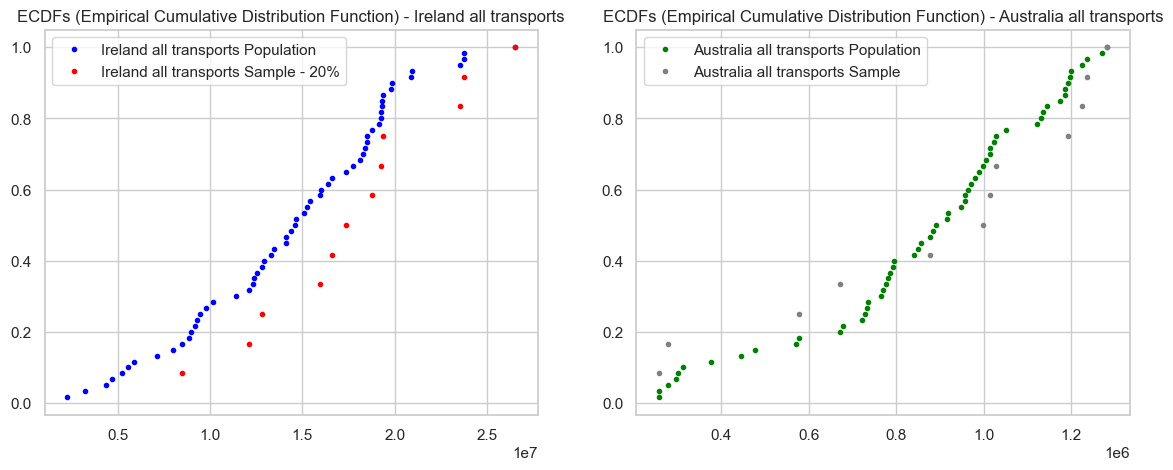

In [51]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y


# ecdf for Ireland all transports
d_x_pop, d_y_pop = ecdf(df_plot_compare['ireland Transports'])
d_x_sample, d_y_sample = ecdf(df_all_sample['ireland Transports'])


# ecdf for Australia all transports
c_x_pop, c_y_pop = ecdf(df_plot_compare['Australia Transports'])
c_x_sample, c_y_sample = ecdf(df_all_sample['Australia Transports'])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Empirical Cumulative Distribution Function) - Ireland all transports
ax0.plot(d_x_pop, d_y_pop, marker='.', linestyle='none', color='blue', label='Ireland all transports Population')
ax0.plot(d_x_sample, d_y_sample, marker='.', linestyle='none', color='red', label='Ireland all transports Sample - 20%')
ax0.set_title('ECDFs (Empirical Cumulative Distribution Function) - Ireland all transports' )
ax0.legend()


# Plot Empirical Cumulative Distribution Function) - Australia all transports
ax1.plot(c_x_pop, c_y_pop, marker='.', linestyle='none', color='green', label='Australia all transports Population')
ax1.plot(c_x_sample, c_y_sample, marker='.', linestyle='none', color='gray', label='Australia all transports Sample')
ax1.set_title('ECDFs (Empirical Cumulative Distribution Function) - Australia all transports' )
ax1.legend()

plt.show()

- In the graphs generated above, the blue and green dots show the confidence interval, and the red and gray dots show the data with the 20% sampling. The behavior of the Australian dataset appears to be better than that of Dublin, but it should be noted that the Irish dataset had 64 missing values ​​filled with the value zero, which may have resulted in greater dispersion, in general they show acceptable behavior .

### T-test

- This test is used to determine whether there is a significant difference between the means of two samples.

In [52]:
# Parametric Test (t-test)
t_stat, p_val = ttest_ind(df_plot_compare['ireland Transports'], df_plot_compare['Australia Transports'])
print(f"T-test: t-statistic = {t_stat}, p-value = {p_val}")

# Conclusion
print("\nConclusions:")
if p_val < 0.05:
    print("There is a significant difference between the two datasets.")
else:
    print("There is no significant difference between the two datasets.")

T-test: t-statistic = 18.468848958110282, p-value = 1.3090227661951217e-36

Conclusions:
There is a significant difference between the two datasets.


### Wilcoxon Test

- This test is a non-parametric technique used to evaluate whether two independent samples were selected from populations with the same distribution. This is an alternative to independent samples, especially when the data does not follow normal distributions.

In [53]:
# Non-Parametric Test (Wilcoxon)
u_stat, p_val = mannwhitneyu(df_plot_compare['ireland Transports'], df_plot_compare['Australia Transports'])
print(f"Wilcoxon test: U-statistic = {u_stat}, p-value = {p_val}")

# Conclusion
print("\nConclusions:")
if p_val < 0.05:
    print("There is a significant difference between the two datasets.")
else:
    print("There is no significant difference between the two datasets.")

Wilcoxon test: U-statistic = 3600.0, p-value = 3.5565709749847226e-21

Conclusions:
There is a significant difference between the two datasets.


### Chi-squared test 

- A statistical technique used to evaluate the association or independence between two categorical variables. It is used when you want to compare the frequency distribution observed in a crossover table with an expected distribution under the null hypothesis of independence of variables.

In [54]:
# Chi-Squared Test
# Assuming we want to compare the weekday distribution between the two datasets
contingency_table = pd.crosstab(df_plot_compare['ireland Transports'], df_plot_compare['Australia Transports'])
chi2, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Squared Test: Chi2 statistic = {chi2}, p-value = {p_val}")

# Conclusion
print("\nConclusions:")
if p_val < 0.05:
    print("There is a significant difference between the two datasets.")
else:
    print("There is no significant difference between the two datasets.")

Chi-Squared Test: Chi2 statistic = 3540.0, p-value = 0.23850194637923627

Conclusions:
There is no significant difference between the two datasets.


### Hypothesis testing

- Performs a t-test for two independent samples with unequal variances and interprets the result based on the p-value. The t_stat is the value of the t-statistic, which measures the difference between sample means in terms of standard deviations. The p_value is the p-value associated with the statistical test.
- In this case, the t-test is used to determine whether the means of the two samples, Ireland Transports and Australia Transports, are different in a statistically significant way, based on the p-value calculated from the observed samples.

In [55]:
# Hypothesis Testing (comparing means using t-test)
t_stat, p_value = stats.ttest_ind(df_plot_compare['ireland Transports'], df_plot_compare['Australia Transports'], equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Ireland has more public transports usage than Australia.")
else:
    print("Fail to reject the null hypothesis: No significant difference in public transports usage between Ireland and Australia.")

T-statistic: 18.468848958110286
P-value: 2.845959797458664e-26
Reject the null hypothesis: Ireland has more public transports usage than Australia.


## Machine Learning

In [56]:
# Preparing dataset for use in machine learning
X = df_pivot.copy() # creating a copy of the dataset
X['difference in a 4 week interval'] = df_pivot['All public transport, excluding LUAS'] - df_pivot['All public transport, excluding LUAS'].shift(4) # creating column with a difference in a 4 week interval
X['date 4 weeks ahead'] = X['Date'].shift(-4) # Date 4 weeks ahead
X['expected value in 4 weeks'] = X['All public transport, excluding LUAS'].shift(-4) # value 4 weeks ahead
X.dropna(inplace=True)
display(X.head())

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail,Year,Date,Year-Month,difference in a 4 week interval,date 4 weeks ahead,expected value in 4 weeks
Date,,,,,,,,,,
2019-02-03,3597261.0,672440.0,2924821.0,0.0,2019,2019-02-03,2019-02,1111772.0,2019-03-03,3695468.0
2019-02-10,3676533.0,696573.0,2979960.0,0.0,2019,2019-02-10,2019-02,333190.0,2019-03-10,3783653.0
2019-02-17,3790304.0,736594.0,3053710.0,0.0,2019,2019-02-17,2019-02,327529.0,2019-03-17,3729482.0
2019-02-24,3604972.0,677931.0,2927041.0,0.0,2019,2019-02-24,2019-02,70486.0,2019-03-24,3407670.0
2019-03-03,3695468.0,706297.0,2989171.0,0.0,2019,2019-03-03,2019-03,98207.0,2019-03-31,3886607.0


In [57]:
def extract_date_features(dataframe, date_column):
    dataframe[date_column+'_year'] = dataframe[date_column].dt.year
    dataframe[date_column+'_month'] = dataframe[date_column].dt.month
    dataframe[date_column+'_day'] = dataframe[date_column].dt.day
    
    return dataframe

In [58]:
X = extract_date_features(X, 'Date')
X = extract_date_features(X, 'date 4 weeks ahead')
display(X.head())

Mode of Transport,"All public transport, excluding LUAS","Bus, excluding Dublin Metro",Dublin Metro Bus,Rail,Year,Date,Year-Month,difference in a 4 week interval,date 4 weeks ahead,expected value in 4 weeks,Date_year,Date_month,Date_day,date 4 weeks ahead_year,date 4 weeks ahead_month,date 4 weeks ahead_day
Date,,,,,,,,,,,,,,,,
2019-02-03,3597261.0,672440.0,2924821.0,0.0,2019,2019-02-03,2019-02,1111772.0,2019-03-03,3695468.0,2019,2,3,2019,3,3
2019-02-10,3676533.0,696573.0,2979960.0,0.0,2019,2019-02-10,2019-02,333190.0,2019-03-10,3783653.0,2019,2,10,2019,3,10
2019-02-17,3790304.0,736594.0,3053710.0,0.0,2019,2019-02-17,2019-02,327529.0,2019-03-17,3729482.0,2019,2,17,2019,3,17
2019-02-24,3604972.0,677931.0,2927041.0,0.0,2019,2019-02-24,2019-02,70486.0,2019-03-24,3407670.0,2019,2,24,2019,3,24
2019-03-03,3695468.0,706297.0,2989171.0,0.0,2019,2019-03-03,2019-03,98207.0,2019-03-31,3886607.0,2019,3,3,2019,3,31


### GridSearchCV

In [59]:
# function to evaluate and plot the prediction, it use the features, target and regressor, also it uses (70%) of data points for training and the rest for testing

def eval_on_features(features, target, model, xlabel='', ylabel='', **kwargs):

    X_train, X_test, y_train, y_test = train_test_split(
        features,
        target,
        train_size=0.7,
        shuffle=False,
        random_state=0
    )

    try:
       # Creating the GridSearchCV object
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=kwargs['params_grid'],
            scoring='neg_mean_squared_error',  # Specifying the metric to be optimized
        )

        
        # Carrying out the search for the best hyperparameters
        grid_search.fit(X_train, y_train)
        # Getting the best parameters found
        best_params = grid_search.best_params_
        # Training the model with the best parameters on the complete training set
        best_model = model.set_params(**best_params)
        best_model.fit(X_train, y_train)
        pred = best_model.predict(X_test)
    except BaseException as error:
        display(error)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

    display(f"R2 Score: {mean_squared_error(y_test, pred)}")

    # Plotting the chart
    template = go.Figure()

    template.update_layout(plot_bgcolor = 'RGBA(255,255,255,0)', title='Model Performance x Real Data')
    template.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
    showline=True, linewidth=1, linecolor='white', title="Years")
    template.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
    showline=True, linewidth=1, linecolor='white', title="Value")

    template.add_trace(
        go.Scatter(
            x=features.index,
            y=target,
            name='Real',
            line=dict(color='RGBA(0,0,255,1)')
        )
    )

    template.add_trace(
        go.Scatter(
            x=X_test.index,
            y=pred,
            name='Model',
            line=dict(color='RGBA(255,0,0,1)')
        )
    )

    template.show()
    # End of the chart

    try:
        return best_model, best_params
    except:
        return model

### Regression Models

- Three methods were used to find the best regression model. The first is a relatively newer method, XGBRegressor, which runs through the XGBoost library and is considered an efficient implementation of gradient boosting; the technique is frequently used for predictive modeling. For this model comparison, the other two models are Lars and the Decision tree using the sklearn library.

### SGBRegressor

In [60]:
from xgboost import XGBRegressor

# Create an object 'regressor' 
model = XGBRegressor()

features = X[['Date_year', 'Date_month', 'Date_day']]
target = X['All public transport, excluding LUAS']

params_grid = {
    'learning_rate': [None,0.5,0.7],
    'n_estimators': [None,100,200],
    'max_depth': [None,3, 7],
    # 'min_child_weight': [1, 3, 5],
    # 'subsample': [0.8, 0.9, 1.0],
    # 'colsample_bytree': [0.8, 0.9, 1.0],
    # 'gamma': [0, 0.1, 0.2],
    # 'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [None, 0.1, 1.0]
}

result = eval_on_features(features,target, model, params_grid=params_grid)
try:
    display(result[0].get_params())
except BaseException as error:
    display(error)
    display(result)


'R2 Score: 1486982414494.3496'

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': 0.1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

 - The commented hyperparameters are due to the high computational cost of executing gridsearch()

### Lars Model

In [61]:
from sklearn.linear_model import Lars

# Create an object 'regressor' 
model = Lars()

features = X[['Date_year', 'Date_month', 'Date_day']]
target = X['All public transport, excluding LUAS']

params_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'precompute': ['auto', True, False],
    'eps': [2.220446049250313e-16, 1e-10, 1e-5],
    'n_nonzero_coefs': [None, 10, 20, 30]
}

result = eval_on_features(features,target, model, params_grid=params_grid)
try:
    display(result[0].get_params())
except BaseException as error:
    display(error)
    display(result)

'R2 Score: 3577259995699.883'

{'copy_X': True,
 'eps': 2.220446049250313e-16,
 'fit_intercept': False,
 'fit_path': True,
 'jitter': None,
 'n_nonzero_coefs': 10,
 'normalize': True,
 'precompute': False,
 'random_state': None,
 'verbose': False}

### Decision tree

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

# Create an object 'regressor' 
model = ExtraTreesRegressor()

features = X[['Date_year', 'Date_month', 'Date_day']]
target = X['All public transport, excluding LUAS']

params_grid = {
    'ccp_alpha': [0.0, 0.01, 0.1],
    'criterion': ['squared_error'],
    # 'max_depth': [None],
    # 'max_features': [1.0],
    # 'max_leaf_nodes': [None],
    # 'max_samples': [None],
    # 'min_impurity_decrease': [0.0],
    # 'min_samples_leaf': [1],
    # 'min_samples_split': [2],
    # 'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100, 200, 300],
    'n_jobs': [None, -1]
}

results = eval_on_features(features,target, model, params_grid=params_grid)
try:
    display(f"Best_params: {results[0]}")
except :
    display(results.get_params())

'R2 Score: 1464027292312.0974'

'Best_params: ExtraTreesRegressor(ccp_alpha=0.1)'

#### Conclusion
- SGBRegressor was the algorithm that, among the three tested, presented the most acceptable result, and this can be proven graphically.

## Sentiment Analysis

### Loading data through the API, and transforming the JSON into a pandas Dataframe

In [63]:
# api request url
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NTA56/JSON-stat/1.0/en"
data_sentiment = requests.get(url=url).json()

In [64]:
# JSON works like a python dictionary, so let's analyze the returned keys
data_sentiment['dataset']['dimension'].keys()

dict_keys(['STATISTIC', 'TLIST(A1)', 'C02076V02508', 'C02199V02655', 'C03660V04402', 'role', 'id', 'size'])

In [65]:
list(data_sentiment['dataset']['dimension'].keys())[:-3]

['STATISTIC', 'TLIST(A1)', 'C02076V02508', 'C02199V02655', 'C03660V04402']

In [66]:
# creating an empty dictionary
dict_data_sentimen = {}

# creating the value key to the dictionary and adding the values ​​received from the api
dict_data_sentimen['VALUE'] = data_sentiment['dataset']['value']

len_values = dict_data_sentimen['VALUE'].__len__()

# creating the other keys received in the API in our new dictionary
for k in list(data_sentiment['dataset']['dimension'].keys())[:-3]:
    dict_data_sentimen[data_sentiment['dataset']['dimension'][k]['label']] = []
    # dict_data_sentimen[data_sentiment['dataset']['dimension'][k]['label']] = list(data_sentiment['dataset']['dimension'][k]['category']['label'].values())
    # len_col = (len_values / list(data_sentiment['dataset']['dimension'][k]['category']['label'].values()).__len__())
    # display(len_col)
    # for i in range(int(len_col)-1):
    #     dict_data_sentimen[data_sentiment['dataset']['dimension'][k]['label']] += list(data_sentiment['dataset']['dimension'][k]['category']['label'].values())
    

In [67]:
# checking the values returned by the api in each dimension key
for k in list(data_sentiment['dataset']['dimension'].keys())[:-3]:
    display(f"{k}: {data_sentiment['dataset']['dimension'][k]['category']['label'].values()}")

"STATISTIC: dict_values(['Reasons for not using bus services more frequently'])"

"TLIST(A1): dict_values(['2019', '2021'])"

"C02076V02508: dict_values(['18 - 24 years', '25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', '65 - 74 years', '75 years and over'])"

"C02199V02655: dict_values(['Male', 'Female'])"

'C03660V04402: dict_values([\'Inconvenient\', \'No service nearby\', \'No service to where I want to go\', \'Health concerns relating to transmission of COVID-19 using this mode of transport\', \'Infrequent\', \'Unreliable\', "Don\'t like it", \'Difficult to use due to disabilities\', \'Too expensive\', \'Concerns for safety of the person using this mode of transport\', \'Concerns of the individual experiencing discrimination or harassment using this mode of transport\', \'I have no need to use more frequently\'])'

#### Adding the values ​​of each key in our new dictionary correctly, repeating the values ​​in each line correctly

In [68]:
dict_data_sentimen['Statistic'] = ['Reasons for not using bus services more frequently' for i in range(len_values)]

In [69]:
dict_data_sentimen['Year'] = [2019 for i in range(len_values//2)]
dict_data_sentimen['Year'] += [2021 for i in range(len_values//2)]

In [70]:
len_values/list(data_sentiment['dataset']['dimension']['C03660V04402']['category']['label'].values()).__len__()

28.0

In [71]:
values = list(data_sentiment['dataset']['dimension']['C03660V04402']['category']['label'].values())
dict_data_sentimen['Reason'] = [values for i in range(28)]
dict_data_sentimen['Reason'] = np.array(dict_data_sentimen['Reason']).reshape(-1)

In [72]:
for i in range(14):
    for i1 in range(12):
        dict_data_sentimen['Sex'].append("Male")
    for i1 in range(12):
        dict_data_sentimen['Sex'].append("Female")

In [73]:
values_group_age = list(data_sentiment['dataset']['dimension']['C02076V02508']['category']['label'].values())
values_group_age

['18 - 24 years',
 '25 - 34 years',
 '35 - 44 years',
 '45 - 54 years',
 '55 - 64 years',
 '65 - 74 years',
 '75 years and over']

In [74]:
for i in range(2):
    for value in values_group_age:
        for i1 in range(24):
            dict_data_sentimen['Age Group'].append(value)

#### Transforming our new dictionary into a pandas dataframe

In [75]:
df_sentiment = pd.DataFrame(dict_data_sentimen, columns=['Statistic','Year','Age Group','Sex','Reason','VALUE'])
df_sentiment.head()

,Statistic,Year,Age Group,Sex,Reason,VALUE
0,Reasons for not using bus services more freque...,2019,18 - 24 years,Male,Inconvenient,13.4
1,Reasons for not using bus services more freque...,2019,18 - 24 years,Male,No service nearby,13.4
2,Reasons for not using bus services more freque...,2019,18 - 24 years,Male,No service to where I want to go,10.5
3,Reasons for not using bus services more freque...,2019,18 - 24 years,Male,Health concerns relating to transmission of CO...,NaN
4,Reasons for not using bus services more freque...,2019,18 - 24 years,Male,Infrequent,15.6


In [76]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Statistic  336 non-null    object 
 1   Year       336 non-null    int64  
 2   Age Group  336 non-null    object 
 3   Sex        336 non-null    object 
 4   Reason     336 non-null    object 
 5   VALUE      270 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.9+ KB


In [77]:
for k in df_sentiment.keys():
    display(f"{k}: {df_sentiment[k].unique().__len__()}")

'Statistic: 1'

'Year: 2'

'Age Group: 7'

'Sex: 2'

'Reason: 12'

'VALUE: 176'

In [78]:
fig = px.bar(
    df_sentiment.groupby(["Reason"])['VALUE'].sum().reset_index().sort_values(by="VALUE", ascending=False),
    x="VALUE",
    y="Reason",
    orientation="h",
    title="Sum of the % of all reasons"
)
fig.update_xaxes(title="Sum %")
fig.update_yaxes(title="Reason")
fig.show()

In [79]:
df_sentiment_filter = df_sentiment.loc[(df_sentiment['Reason']=="Inconvenient")].groupby(["Year","Sex"])['VALUE'].sum().reset_index()
df_sentiment_filter['Year'] = df_sentiment_filter['Year'].astype("str")

fig = px.bar(
    df_sentiment_filter,
    x="Year",
    y="VALUE",
    barmode="group",
    text="Sex",
    color="Sex",
    title="Men vs Women for inconvenient reason"
)
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Value in %")
fig.show()

### importing ireland transport posts from reddit via API

In [82]:
import praw

client_id = "YOUR_CLIENT_ID"
secret_id = "YOUR_SECRET_KEY"

reddit = praw.Reddit(
    client_id=client_id, 
    client_secret=secret_id, 
    user_agent = True
    )

In [83]:
subreddit = reddit.subreddit("ireland")

results = subreddit.search("Public transport", limit=500)

posts = [post for post in results]

In [84]:
dict_data = {
    "title":[post.title for post in posts],
    "text":[post.selftext for post in posts]
}

In [85]:
df_posts_reddit_ireland = pd.DataFrame(dict_data)
df_posts_reddit_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   221 non-null    object
 1   text    221 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [86]:
display(df_posts_reddit_ireland)

,title,text
0,Eamon Ryan: Free public transport would 'incre...,
1,Dublin is worst capital in Europe for public t...,Shame they didn't mention speed to get in and ...
2,Oddest experience you’ve ever had on Irish pub...,What’s the weirdest thing you’ve ever gone thr...
3,Poll: Would you support a subsidised €9 monthl...,
4,'Too many cars' on our roads hampering public ...,
...,...,...
216,Irish among least likely to use public transpo...,
217,9 out of 10 passengers satisfied with public t...,
218,"Help with public transport, please",I will be travelling in Ireland on a solo back...
219,What it's like being a blind person in Dublin ...,[https://www.youtube.com/watch?v=kjjpFvYi1Yg](...


In [87]:
df_posts_reddit_ireland['full_text'] = df_posts_reddit_ireland['title'] +'\n'+ df_posts_reddit_ireland['text']
df_posts_reddit_ireland

,title,text,full_text
0,Eamon Ryan: Free public transport would 'incre...,,Eamon Ryan: Free public transport would 'incre...
1,Dublin is worst capital in Europe for public t...,Shame they didn't mention speed to get in and ...,Dublin is worst capital in Europe for public t...
2,Oddest experience you’ve ever had on Irish pub...,What’s the weirdest thing you’ve ever gone thr...,Oddest experience you’ve ever had on Irish pub...
3,Poll: Would you support a subsidised €9 monthl...,,Poll: Would you support a subsidised €9 monthl...
4,'Too many cars' on our roads hampering public ...,,'Too many cars' on our roads hampering public ...
...,...,...,...
216,Irish among least likely to use public transpo...,,Irish among least likely to use public transpo...
217,9 out of 10 passengers satisfied with public t...,,9 out of 10 passengers satisfied with public t...
218,"Help with public transport, please",I will be travelling in Ireland on a solo back...,"Help with public transport, please\nI will be ..."
219,What it's like being a blind person in Dublin ...,[https://www.youtube.com/watch?v=kjjpFvYi1Yg](...,What it's like being a blind person in Dublin ...


#### Sentiment analisys with VADER

In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [89]:
analyser = SentimentIntensityAnalyzer()

In [90]:
def polarity(text):
    if analyser.polarity_scores(text)['compound'] >= 0.5:
        return 'positive'
    elif analyser.polarity_scores(text)['compound'] <= -0.5:
        return 'negative'
    else:
        return 'neutral'

df_posts_reddit_ireland['sentiment'] = df_posts_reddit_ireland['full_text'].apply(polarity)

In [91]:
df_posts_reddit_ireland

,title,text,full_text,sentiment
0,Eamon Ryan: Free public transport would 'incre...,,Eamon Ryan: Free public transport would 'incre...,positive
1,Dublin is worst capital in Europe for public t...,Shame they didn't mention speed to get in and ...,Dublin is worst capital in Europe for public t...,negative
2,Oddest experience you’ve ever had on Irish pub...,What’s the weirdest thing you’ve ever gone thr...,Oddest experience you’ve ever had on Irish pub...,neutral
3,Poll: Would you support a subsidised €9 monthl...,,Poll: Would you support a subsidised €9 monthl...,neutral
4,'Too many cars' on our roads hampering public ...,,'Too many cars' on our roads hampering public ...,neutral
...,...,...,...,...
216,Irish among least likely to use public transpo...,,Irish among least likely to use public transpo...,neutral
217,9 out of 10 passengers satisfied with public t...,,9 out of 10 passengers satisfied with public t...,neutral
218,"Help with public transport, please",I will be travelling in Ireland on a solo back...,"Help with public transport, please\nI will be ...",positive
219,What it's like being a blind person in Dublin ...,[https://www.youtube.com/watch?v=kjjpFvYi1Yg](...,What it's like being a blind person in Dublin ...,neutral


#### Performing simple clustering with PyCaret

In [92]:
from pycaret.clustering import ClusteringExperiment
cluster = ClusteringExperiment()

In [93]:
features = df_posts_reddit_ireland['full_text'].reset_index().drop(columns=['index'])

In [94]:
pre_process = cluster.setup(data=features, text_features=['full_text'], use_gpu=True, html=False, session_id=123)

                       Description                 Value
0                       Session id                   123
1              Original data shape              (221, 1)
2           Transformed data shape           (221, 2645)
3                    Text features                     1
4                       Preprocess                  True
5                  Imputation type                simple
6               Numeric imputation                  mean
7           Categorical imputation                  mode
8   Text features embedding method                tf-idf
9                         CPU Jobs                    -1
10                         Use GPU                  True
11                  Log Experiment                 False
12                 Experiment Name  cluster-default-name
13                             USI                  6f1c


In [95]:
kmeans = pre_process.create_model(estimator='kmeans', num_clusters=3, verbose=False)
kmeans

KMeans(n_clusters=3, random_state=123)

In [96]:
pre_process.plot_model(estimator=kmeans, plot='cluster')

In [97]:
pre_process.plot_model(estimator=kmeans, plot='distribution')

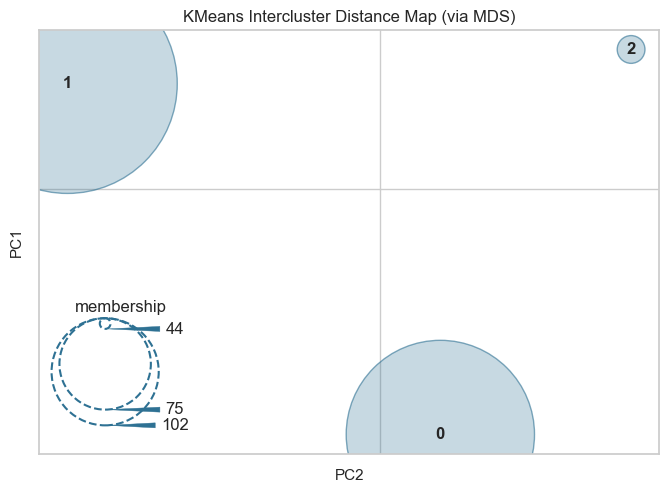

In [98]:
pre_process.plot_model(estimator=kmeans, plot='distance')

In [99]:
pre_process.assign_model(kmeans)

,full_text,Cluster
0,Eamon Ryan: Free public transport would 'incre...,Cluster 2
1,Dublin is worst capital in Europe for public t...,Cluster 1
2,Oddest experience you’ve ever had on Irish pub...,Cluster 1
3,Poll: Would you support a subsidised €9 monthl...,Cluster 2
4,'Too many cars' on our roads hampering public ...,Cluster 2
...,...,...
216,Irish among least likely to use public transpo...,Cluster 2
217,9 out of 10 passengers satisfied with public t...,Cluster 0
218,"Help with public transport, please\nI will be ...",Cluster 1
219,What it's like being a blind person in Dublin ...,Cluster 2


From this clustering, it is possible to analyze some lines of each cluster to check if it is possible to define the clusters as being ``positive``, ``negative`` or ``neutral`` comments.

A more precise analysis could be carried out based on the comments on each reddit publication, and better data processing could be carried out, as when it comes to texts, good cleaning and preparation directly influences the final result of the clustering. This would require more working time. But in the general context, tests were carried out, comments were demonstrated and clustering was presented.

End...